
# **IBM HR Analytics Employee Attrition & Performance**

## **1. Introduction**
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Attrition Rate: the percentage of employees leaving an organization over a certain period.



### **1.1 Dataset Overview**

- **Education**: 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
- **Env.Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High
- **Job Involvement**: 1-Low, 2-Medium, 3-High, 4-Very High
- **Job Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High
- **Relationship Satisfaction**: 1-Low, 2-Medium, 3-High, 4-Very High
- **Performance Rating**: 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- **Work-Life Balance**: 1-Bad, 2-Good, 3-Better, 4-Best

This dataset contains information about employee attrition data.



### **1.2 import needed libraries**


In [1]:
import pandas as pd 
import numpy as np
# visylization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
# model and evaluation libraries 
# features encoding, score & reduction libraries 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score,mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from  sklearn.decomposition import PCA

import category_encoders as ce 


#models libraries 
from  sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn import preprocessing

# warning igonore 
import warnings 
warnings.filterwarnings('ignore')

KeyboardInterrupt: 


## **2. Data Preprocessing**
Data preprocessing involves handling missing values, encoding categorical variables, and normalizing features.

### **2.1 Loading the Dataset**


In [98]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [100]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]


### **2.2 Handling Missing Data**
- We will first inspect missing data and then take appropriate steps to handle it, such as filling with mean/median or dropping rows.


In [101]:
# Code to check missing data
missing = df.isnull().sum().sum()
# Code to handle missing data (example: fill with mean)
# df.fillna(df.mean(), inplace=True)
print(f'Missing Data = {missing}')


Missing Data = 0


In [102]:
print('duplicated data = ',df.duplicated().sum())

duplicated data =  0


In [103]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### **2.3 Feature Encoding**
For categorical columns, we need to convert them to numerical values using one-hot encoding or label encoding.


In [104]:
df_cat = df.select_dtypes(include='object')

In [105]:
# Expoloring unique Values in each categorical columns, 
# to check which encoding type is needed
for i,col in enumerate(df_cat.columns):
    print(col)
    print(df[col].unique())


Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Sales' 'Research & Development' 'Human Resources']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


In [106]:
df = df.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1)

In [107]:
# perform One Hor encoding for ['Attrition','Gender'.'OverTime'] 
df_encoded = pd.get_dummies(df,columns=['Attrition','Gender','OverTime'],drop_first=True,dtype=int)

# perform one hot encoder for the rest  of the columns
col_to_encdode= ['BusinessTravel', 'Department', 'EducationField',
                 'JobRole', 'MaritalStatus']
binary_encoder = ce.BinaryEncoder(cols=col_to_encdode)
df_encoded = binary_encoder.fit_transform(df_encoded)

In [108]:
df_encoded.head()

Age  BusinessTravel_0  BusinessTravel_1  DailyRate  Department_0  \
0   41                 0                 1       1102             0   
1   49                 1                 0        279             1   
2   37                 0                 1       1373             1   
3   33                 1                 0       1392             1   
4   27                 0                 1        591             1   

   Department_1  DistanceFromHome  Education  EducationField_0  \
0             1                 1          2                 0   
1             0                 8          1                 0   
2             0                 2          2                 0   
3             0                 3          4                 0   
4             0                 2          1                 0   

   EducationField_1  ...  TotalWorkingYears  TrainingTimesLastYear  \
0                 0  ...                  8                      0   
1                 0  ...                 10                      3   
2                 1  ...                  7                      3   
3                 0  ...                  8                      3   
4                 1  ...                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition_Yes  Gender_Male  \
0                        0                     5              1            0   
1                        1                     7              0            1   
2                        0                     0              1            1   
3                        3                     0              0            0   
4                        2                     2              0            1   

   OverTime_Yes  
0             1  
1             0  
2             1  
3             1  
4             0  

[5 rows x 39 columns]

### **2.4 Feature scalling & normalization**


In [109]:
from sklearn.preprocessing import MinMaxScaler
df.columns
cols= ['MonthlyRate','MonthlyIncome','HourlyRate']
scaler = MinMaxScaler()
df_encoded[cols] =  pd.DataFrame(scaler.fit_transform(df_encoded[cols]))
df_encoded[cols]


MonthlyRate  MonthlyIncome  HourlyRate
0        0.698053       0.262454    0.914286
1        0.916001       0.217009    0.442857
2        0.012126       0.056925    0.885714
3        0.845814       0.100053    0.371429
4        0.583738       0.129489    0.142857
...           ...            ...         ...
1465     0.409396       0.082254    0.157143
1466     0.777474       0.472986    0.171429
1467     0.123670       0.270300    0.814286
1468     0.447661       0.230700    0.471429
1469     0.326601       0.178778    0.742857

[1470 rows x 3 columns]


## **3. Exploratory Data Analysis (EDA)**
In this section, we will conduct an exploratory analysis to understand the distribution of data and identify potential relationships.

### **3.1 Descriptive Statistics**
We will first look at the basic statistics of the dataset.


In [110]:
# Code for descriptive statistics afterencoding 
df_encoded.describe()

Age  BusinessTravel_0  BusinessTravel_1    DailyRate  \
count  1470.000000       1470.000000       1470.000000  1470.000000   
mean     36.923810          0.290476          0.811565   802.485714   
std       9.135373          0.454137          0.391193   403.509100   
min      18.000000          0.000000          0.000000   102.000000   
25%      30.000000          0.000000          1.000000   465.000000   
50%      36.000000          0.000000          1.000000   802.000000   
75%      43.000000          1.000000          1.000000  1157.000000   
max      60.000000          1.000000          1.000000  1499.000000   

       Department_0  Department_1  DistanceFromHome    Education  \
count   1470.000000   1470.000000       1470.000000  1470.000000   
mean       0.696599      0.346259          9.192517     2.912925   
std        0.459884      0.475939          8.106864     1.024165   
min        0.000000      0.000000          1.000000     1.000000   
25%        0.000000      0.000000          2.000000     2.000000   
50%        1.000000      0.000000          7.000000     3.000000   
75%        1.000000      1.000000         14.000000     4.000000   
max        1.000000      1.000000         29.000000     5.000000   

       EducationField_0  EducationField_1  ...  TotalWorkingYears  \
count       1470.000000       1470.000000  ...        1470.000000   
mean           0.216327          0.389796  ...          11.279592   
std            0.411880          0.487870  ...           7.780782   
min            0.000000          0.000000  ...           0.000000   
25%            0.000000          0.000000  ...           6.000000   
50%            0.000000          0.000000  ...          10.000000   
75%            0.000000          1.000000  ...          15.000000   
max            1.000000          1.000000  ...          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
count         1470.000000              1470.000000           1470.000000   
mean             4.229252                 2.187755              4.123129   
std              3.623137                 3.222430              3.568136   
min              0.000000                 0.000000              0.000000   
25%              2.000000                 0.000000              2.000000   
50%              3.000000                 1.000000              3.000000   
75%              7.000000                 3.000000              7.000000   
max             18.000000                15.000000             17.000000   

       Attrition_Yes  Gender_Male  OverTime_Yes  
count    1470.000000  1470.000000   1470.000000  
mean        0.161224     0.600000      0.282993  
std         0.367863     0.490065      0.450606  
min         0.000000     0.000000      0.000000  
25%         0.000000     0.000000      0.000000  
50%         0.000000     1.000000      0.000000  
75%         0.000000     1.000000      1.000000  
max         1.000000     1.000000      1.000000  

[8 rows x 39 columns]

### check outliers 

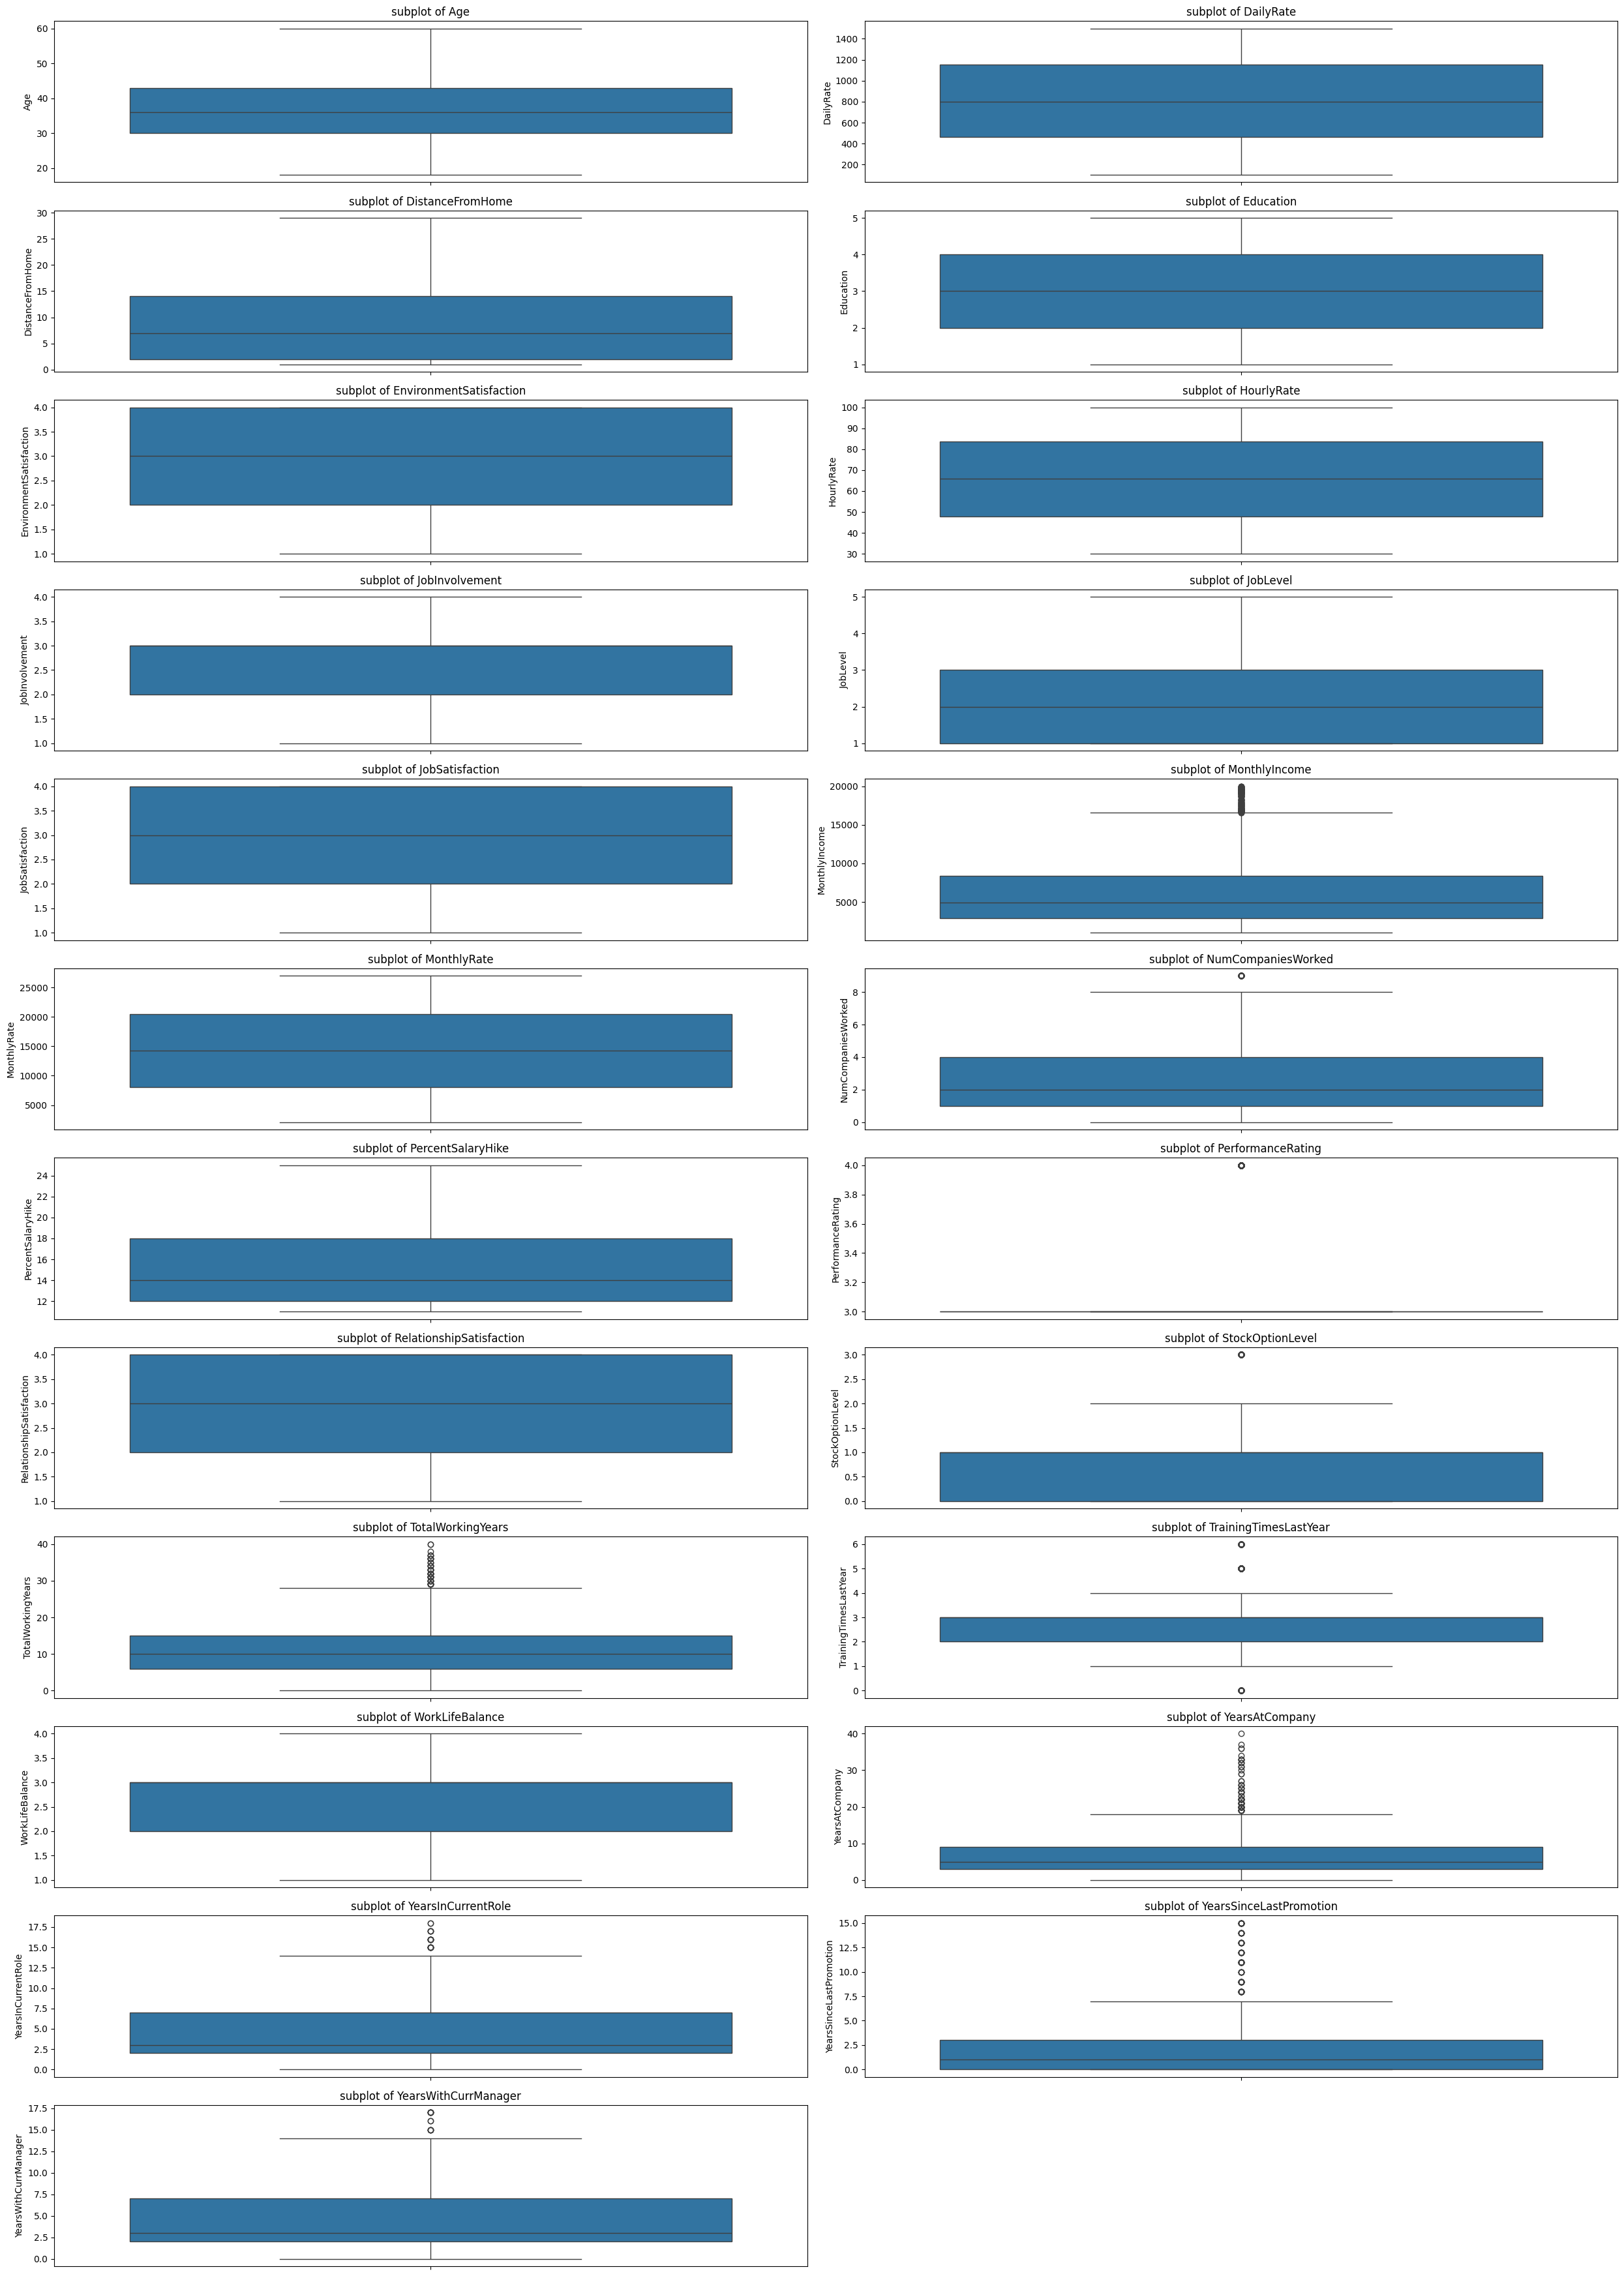

In [111]:
# numerics cols 
fign, axesn = plt.subplots(nrows=12, ncols=2, figsize=(25, 35))
axesn = axesn.flatten()
df_num = df.select_dtypes(include=['int','float64'])
for i , col in enumerate(df_num.columns):
    sns.boxplot(data = df,y=col,ax=axesn[i])
    axesn[i].set_title(f'subplot of {col}')

plt.delaxes(axesn[-1])
plt.tight_layout()
plt.show()



### **3.2 Univariate Analysis**
- **Numerical Features**: Plot histograms and box plots to observe the distribution.
- **Categorical Features**: Plot bar charts to visualize the frequency of categories.


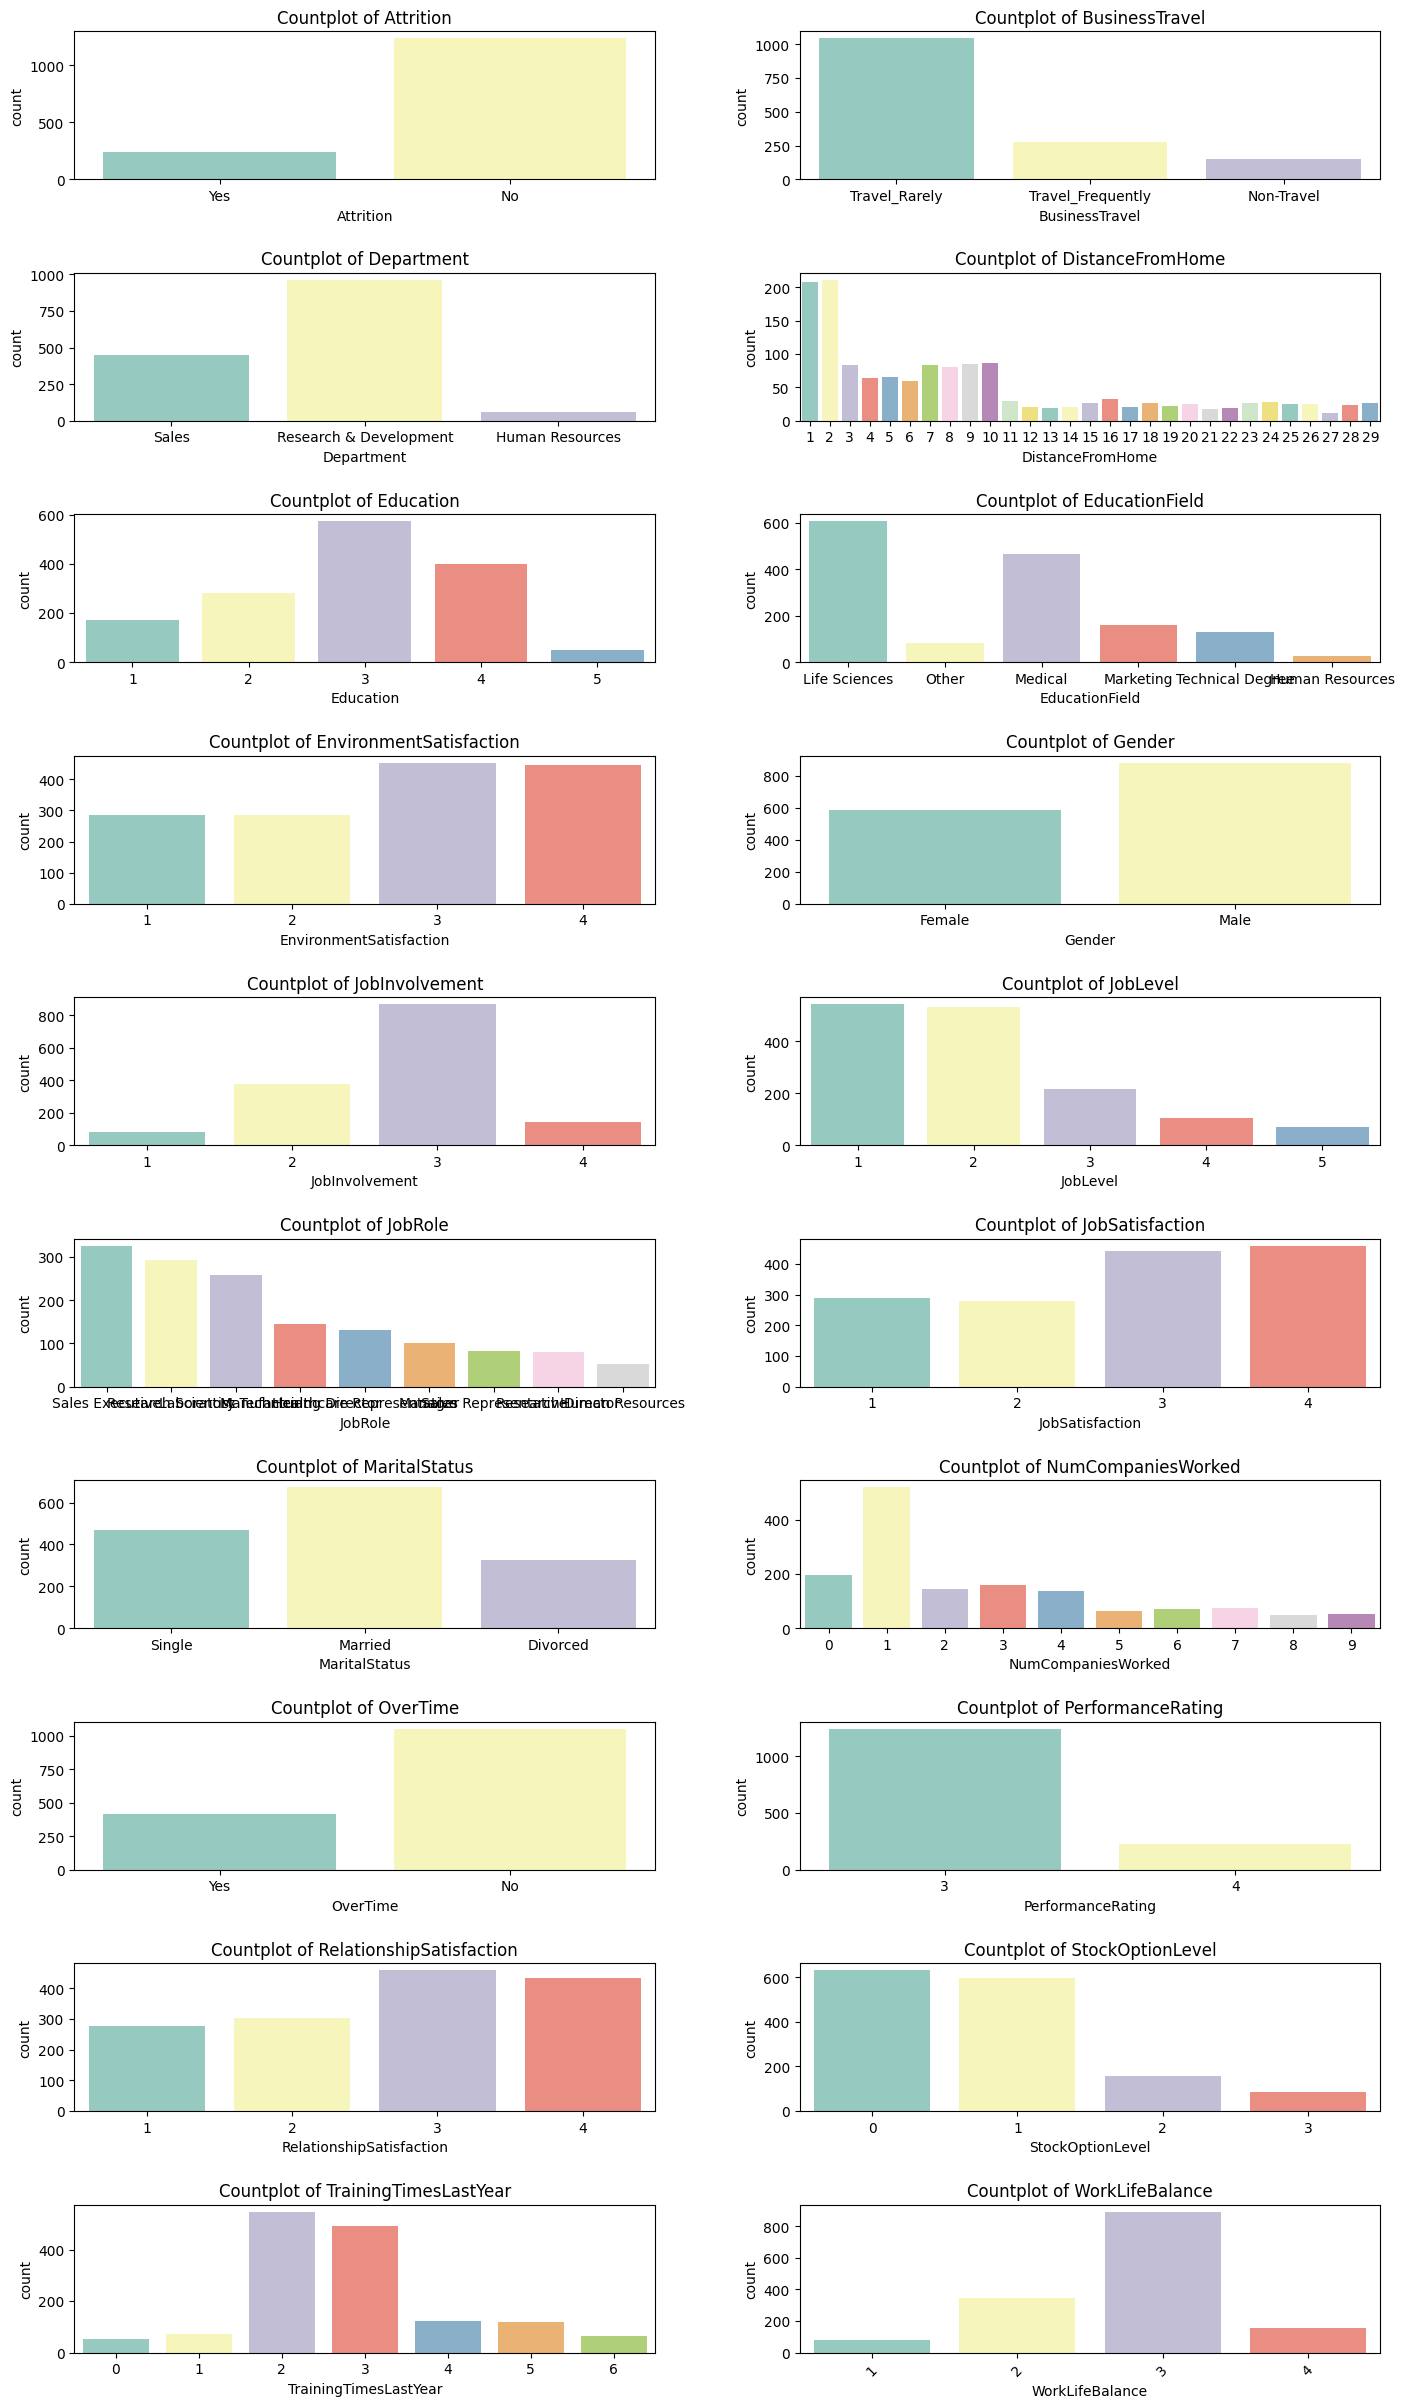

In [112]:
# categorical features & descrete numerical features 
col_desc_cat = ['Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked',
       'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction','StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance']

fig ,axes = plt.subplots(10,2,figsize=(15,25))   
axes = axes.flatten()

for i,col in enumerate(col_desc_cat):
    sns.countplot(data = df, x = col, ax= axes[i],palette='Set3')
    axes[i].set_title(f'Countplot of {col}')
    
plt.xticks(rotation=45)
plt.tight_layout(pad=4.0, h_pad=2.0)
plt.show()

In [113]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

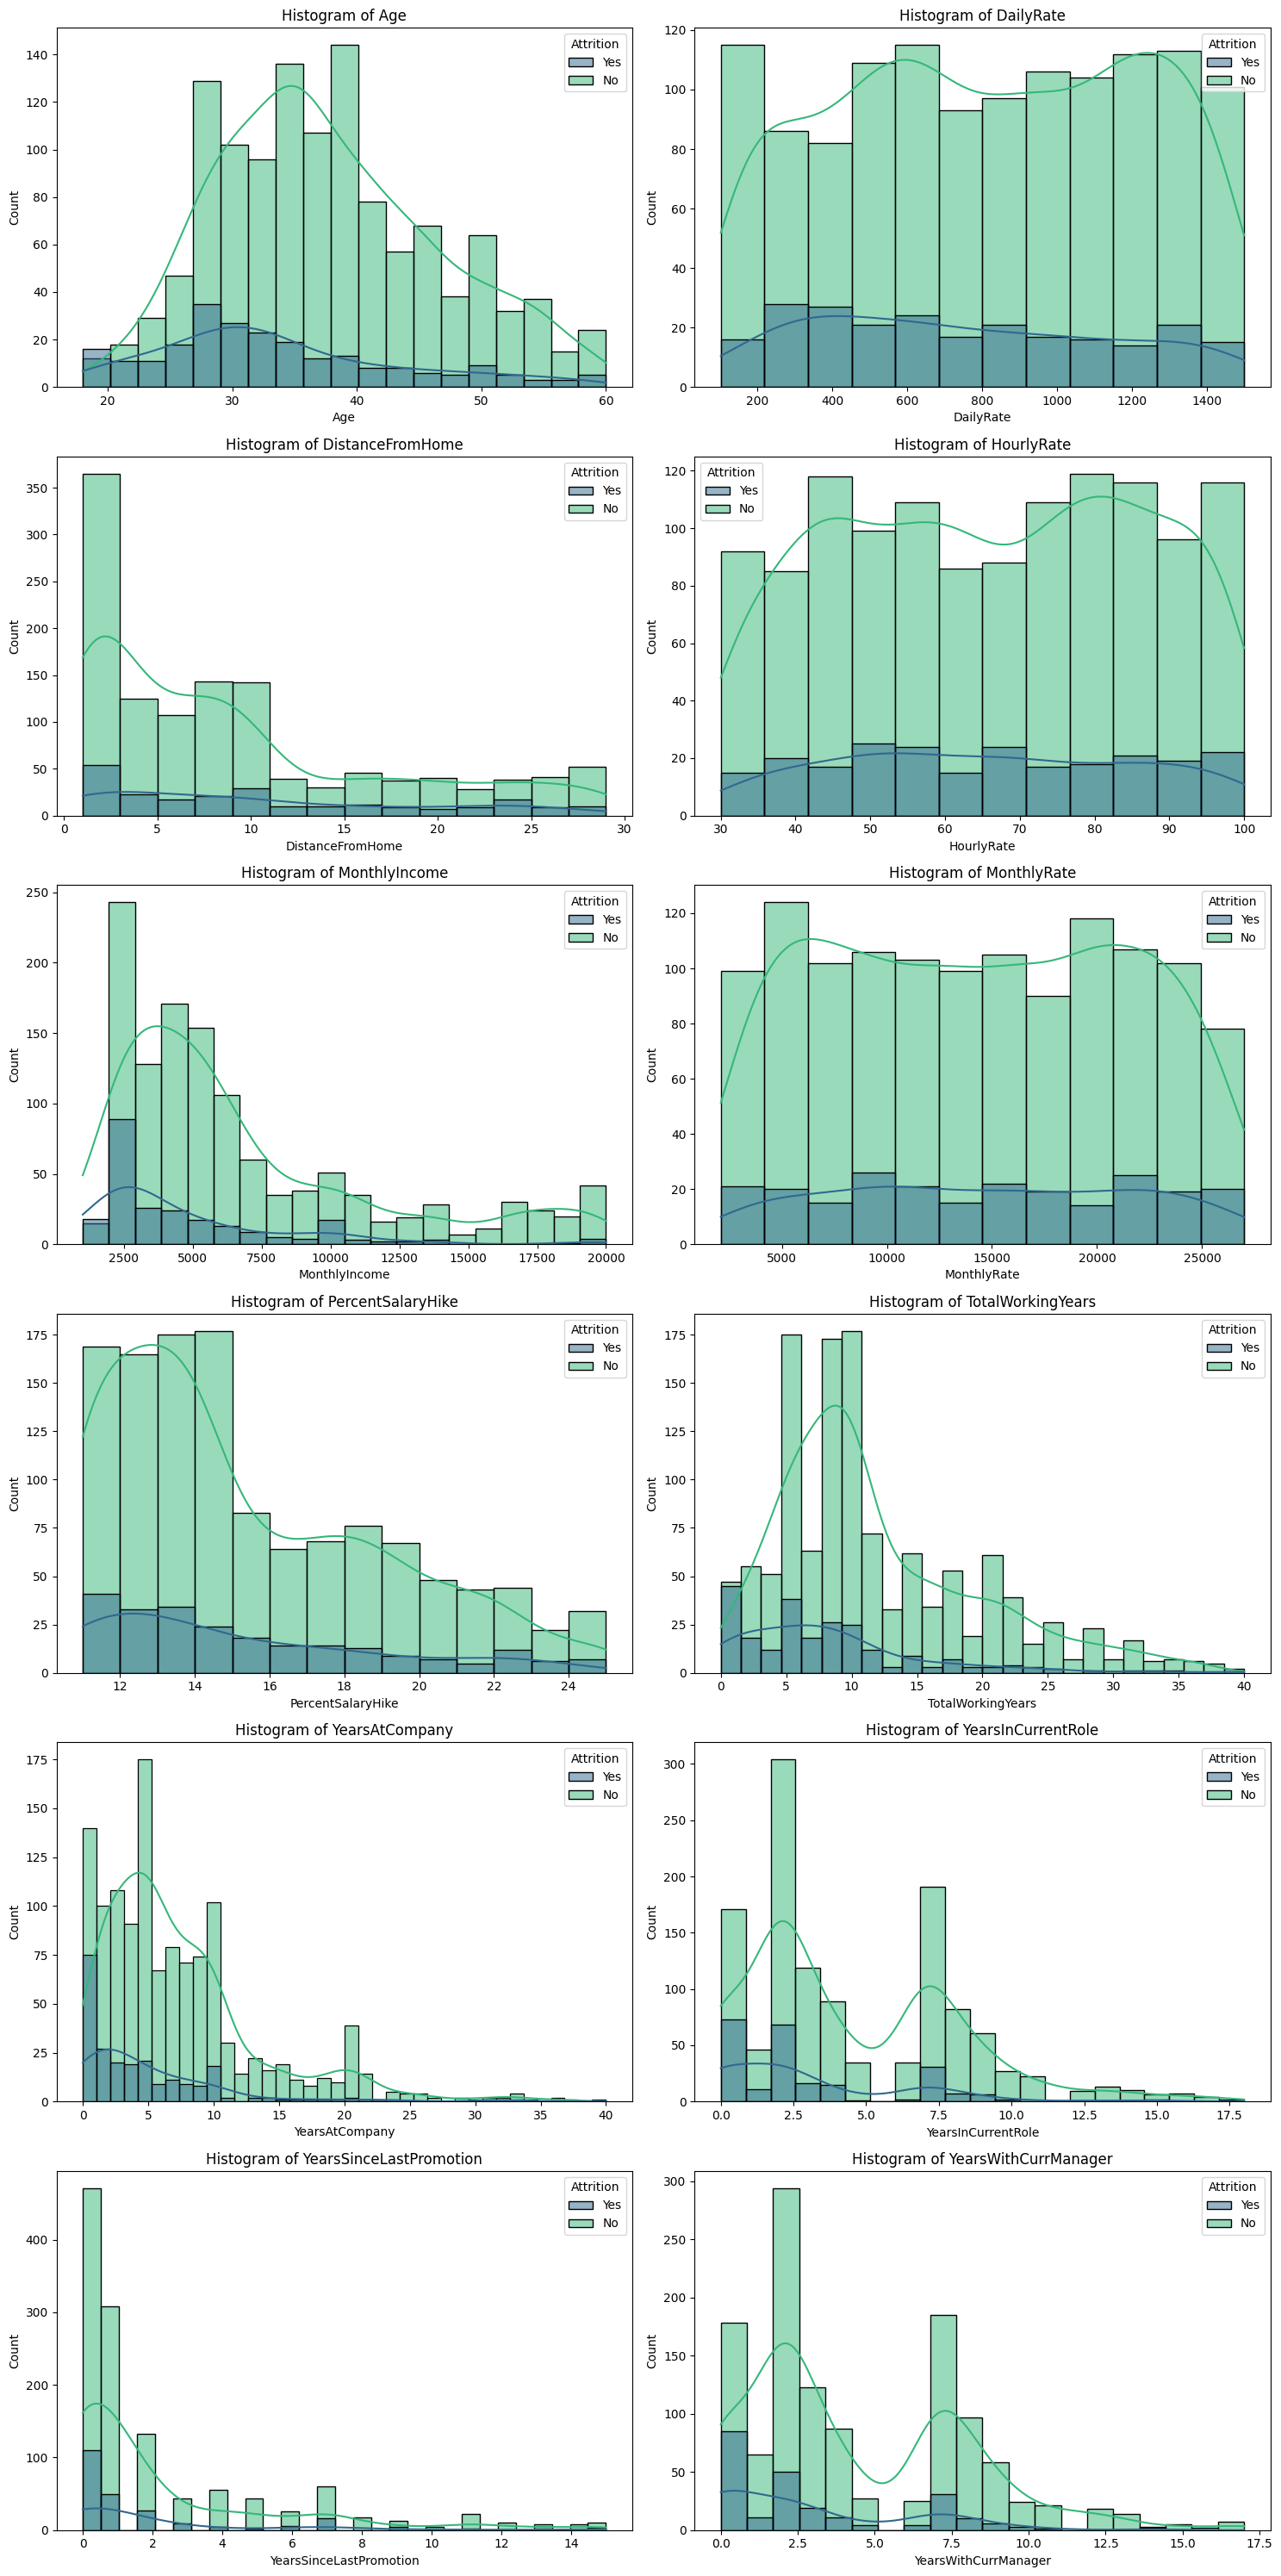

In [114]:
# continous numerical features , Distribution plot
# categorical features & descrete numerical features 
col_num = ['Age', 'DailyRate',
        'DistanceFromHome',
        'HourlyRate','MonthlyIncome',
        'MonthlyRate','PercentSalaryHike',
       'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion','YearsWithCurrManager']

fig ,axes = plt.subplots(6,2,figsize=(15,30))   
axes = axes.flatten()

for i,col in enumerate(col_num):
    sns.histplot(data = df, x = col,hue='Attrition', ax= axes[i],palette='viridis',kde=True)
    axes[i].set_title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()



### **3.3 Bivariate Analysis**
We will investigate relationships between different features using scatter plots, heatmaps, and correlation matrices.


In [115]:
# calclulate the corr matrix 
corr_matrx = df.corr(numeric_only=True)

# set a threshold (0.3, -0.3)
threshold = 0.3

# find highly correlated values 
highly_corr = corr_matrx[(corr_matrx.abs() > threshold) & (corr_matrx != 1.0)]
# Get highly correlated features.
highly_corr_pairs = highly_corr.stack().reset_index()
highly_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Corrleation']

# Dsiplay the highly correlated pairs
highly_corr_pairs


Feature 1                Feature 2  Corrleation
0                       Age                 JobLevel     0.509604
1                       Age            MonthlyIncome     0.497855
2                       Age        TotalWorkingYears     0.680381
3                       Age           YearsAtCompany     0.311309
4                  JobLevel                      Age     0.509604
5                  JobLevel            MonthlyIncome     0.950300
6                  JobLevel        TotalWorkingYears     0.782208
7                  JobLevel           YearsAtCompany     0.534739
8                  JobLevel       YearsInCurrentRole     0.389447
9                  JobLevel  YearsSinceLastPromotion     0.353885
10                 JobLevel     YearsWithCurrManager     0.375281
11            MonthlyIncome                      Age     0.497855
12            MonthlyIncome                 JobLevel     0.950300
13            MonthlyIncome        TotalWorkingYears     0.772893
14            MonthlyIncome           YearsAtCompany     0.514285
15            MonthlyIncome       YearsInCurrentRole     0.363818
16            MonthlyIncome  YearsSinceLastPromotion     0.344978
17            MonthlyIncome     YearsWithCurrManager     0.344079
18        PercentSalaryHike        PerformanceRating     0.773550
19        PerformanceRating        PercentSalaryHike     0.773550
20        TotalWorkingYears                      Age     0.680381
21        TotalWorkingYears                 JobLevel     0.782208
22        TotalWorkingYears            MonthlyIncome     0.772893
23        TotalWorkingYears           YearsAtCompany     0.628133
24        TotalWorkingYears       YearsInCurrentRole     0.460365
25        TotalWorkingYears  YearsSinceLastPromotion     0.404858
26        TotalWorkingYears     YearsWithCurrManager     0.459188
27           YearsAtCompany                      Age     0.311309
28           YearsAtCompany                 JobLevel     0.534739
29           YearsAtCompany            MonthlyIncome     0.514285
30           YearsAtCompany        TotalWorkingYears     0.628133
31           YearsAtCompany       YearsInCurrentRole     0.758754
32           YearsAtCompany  YearsSinceLastPromotion     0.618409
33           YearsAtCompany     YearsWithCurrManager     0.769212
34       YearsInCurrentRole                 JobLevel     0.389447
35       YearsInCurrentRole            MonthlyIncome     0.363818
36       YearsInCurrentRole        TotalWorkingYears     0.460365
37       YearsInCurrentRole           YearsAtCompany     0.758754
38       YearsInCurrentRole  YearsSinceLastPromotion     0.548056
39       YearsInCurrentRole     YearsWithCurrManager     0.714365
40  YearsSinceLastPromotion                 JobLevel     0.353885
41  YearsSinceLastPromotion            MonthlyIncome     0.344978
42  YearsSinceLastPromotion        TotalWorkingYears     0.404858
43  YearsSinceLastPromotion           YearsAtCompany     0.618409
44  YearsSinceLastPromotion       YearsInCurrentRole     0.548056
45  YearsSinceLastPromotion     YearsWithCurrManager     0.510224
46     YearsWithCurrManager                 JobLevel     0.375281
47     YearsWithCurrManager            MonthlyIncome     0.344079
48     YearsWithCurrManager        TotalWorkingYears     0.459188
49     YearsWithCurrManager           YearsAtCompany     0.769212
50     YearsWithCurrManager       YearsInCurrentRole     0.714365
51     YearsWithCurrManager  YearsSinceLastPromotion     0.510224

<Axes: >

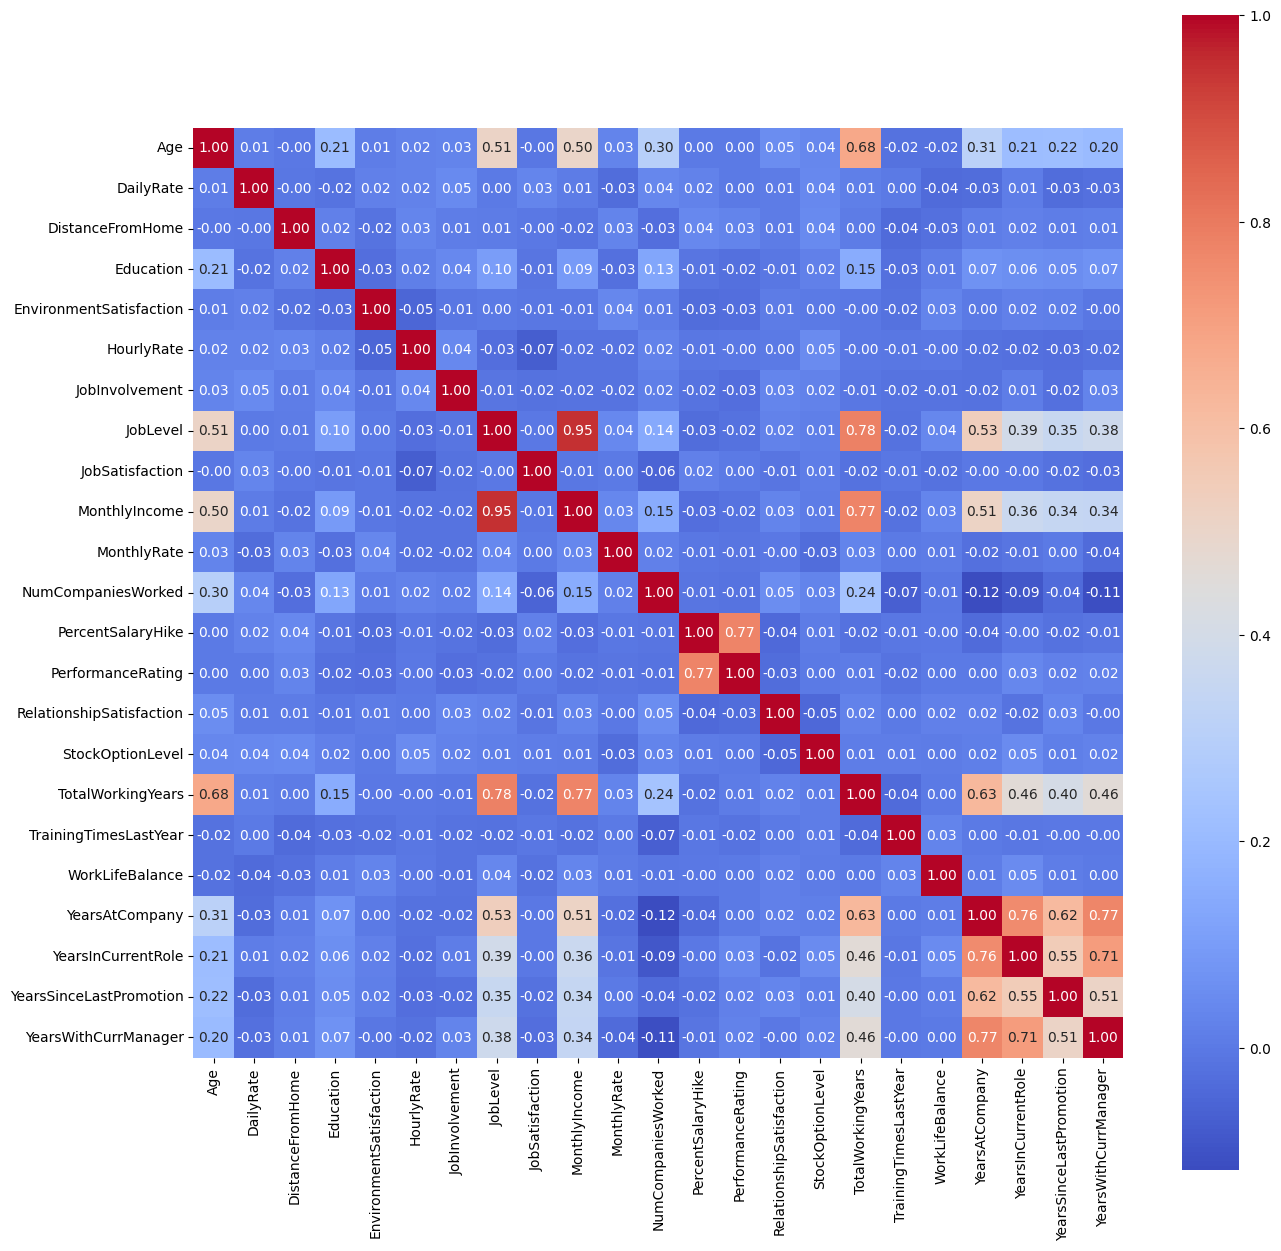

In [116]:
# create a mask for the upper triangle 
mask = corr_matrx.abs() > 0.3
# plot corr matrix 
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrx, annot=True,square=True,fmt='0.2f',cmap='coolwarm',)

<Axes: >

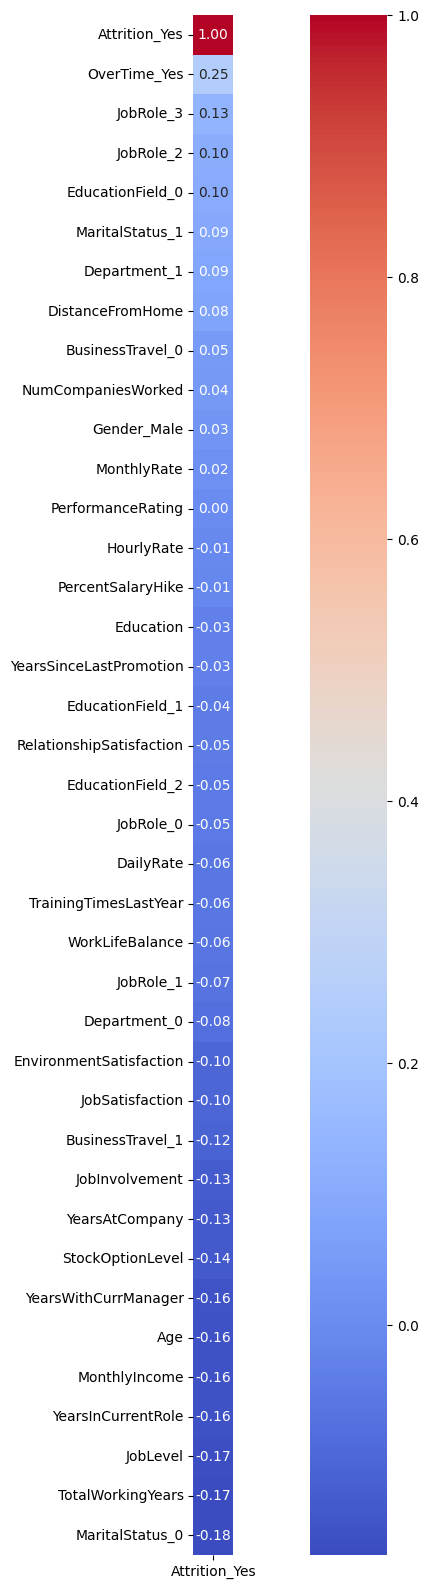

In [117]:
# check highly correlated features with 'Attrition' col
high_corr_features = df_encoded.corr()[['Attrition_Yes']].sort_values(by='Attrition_Yes',ascending=False)
# print(high_corr_features.head(10))
plt.figure(figsize=(20, 20))
sns.heatmap(high_corr_features,annot=True, cmap='coolwarm', square=True,fmt='0.2f')

### OBS : 
- ###  employees who work over time is more tending to atrrition
- ###  employees with high Total Working hours are more likely to leave the company
- ###  Job Level, marital status, Monthly income & years in current role also affects Attristion of employees


## Feature Col VS Target [Attrition]

In [124]:
# set new data set Copy , to edit and delete as you wish in next visulization steps
E_DF = df # Edited DF
E_DF['NumericAttrtion'] =  E_DF['Attrition'].map({'Yes': 1 , 'No': 0})
print(E_DF.NumericAttrtion)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: NumericAttrtion, Length: 1470, dtype: int64


<h5 style="background-color:purple; color:white; padding:20px; text-align:left; width:30%;"> Function used for plotting: </h5>


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to choose visualization set for each column as needed 
# [1 == piechart] - [2 == countplot] - [3 == attrition rate, barplot] - [4 == Histogram] - [5 == boxplot]
def pick_plot(plotType, col, DF, c1=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
              c2=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"] ):
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Create subplots
    for i in range(2):
        # Set color palette
        c = c1 if i == 0 else c2
            
        # Plot 1: Piechart
        if plotType[i] == 1:
            axes[i].pie(x=DF[col].value_counts(),
                        labels=DF[col].value_counts().index,
                        autopct="%.2f%%", 
                        textprops={"fontweight": "black", "size": 15},
                        colors=c, pctdistance=0.75, startangle=90)
            axes[i].set_title(f"Employees by {col}", fontweight="black", pad=15, size=18)
            center_circle = plt.Circle((0, 0), 0.4, fc='white')  # Add center circle for a donut chart
            fig.gca().add_artist(center_circle)

        # Plot 2: Countplot
        elif plotType[i] == 2:
            sns.countplot(data=DF, x=col, palette=c, ax=axes[i], order=DF[col].value_counts().index)
            axes[i].set_title(f"Employee by {col}", fontweight="black", size=20, pad=20)
        
        # Plot 3: Attrition Rate Barplot
        elif plotType[i] == 3:
            # # Convert 'Attrition' to numeric if needed
            # if DF['Attrition'].dtype == 'object':
            #     DF['Attrition_numeric'] = DF['Attrition'].map({'Yes': 1, 'No': 0})
            #     attr_col = 'Attrition_numeric'
            # else:
            #     attr_col = 'Attrition'
            
            att_rate = DF.groupby([col])['NumericAttrtion'].mean().reset_index()
            ordered_col = DF.groupby([col])['NumericAttrtion'].mean().sort_values(ascending=False).index
            sns.barplot(data=att_rate, x=col, y='NumericAttrtion', palette=c, ax=axes[i], order=ordered_col)
            axes[i].set_title(f"Employee Attrition Rate by {col}", fontweight="black", size=20, pad=20)

        # Plot 4: Histogram
        elif plotType[i] == 4:
            sns.histplot(data=DF, x=col, hue='Attrition', kde=True, palette=c, ax=axes[i])
            axes[i].set_title(f"Employee Attrition by {col}", fontweight="black", size=20, pad=15)
        
        # Plot 5: Boxplot
        elif plotType[i] == 5:
            sns.boxplot(data=DF, x='Attrition', y=col, palette=c, ax=axes[i])
            axes[i].set_title(f"Employee Distribution by {col} & Attrition", fontweight="black", size=20, pad=10)
        
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [23]:
# # function to choose visulizatino set for each columns as needed 
# # [1 == piechart] - [2 == countplot] - [3 == attirion rate, barplot] - [4 == Histogram] - [5 == boxblot]
# def pick_plot(plotType,col,DF,c1 =['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
#               c2=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"] ):
    
#     fig , axes= plt.subplots(1,2,figsize=(20,6))
#     for i in range(2):
#         if i ==0 : 
#             c = c1
#         elif i == 1 :
#             c = c2
         
#         if plotType[i] == 1:
#             # plt.subplot(1,2,i+1)
#             plt.title(f"Employees by {col}",fontweight="black",pad=15,size=18)
#             axes[i].pie(data=DF, x=DF[col].value_counts(),
#             labels=DF[col].value_counts().index,
#             autopct="%.2f%%",textprops={"fontweight":"black","size":15},
#             colors=c,pctdistance=0.75,startangle=90,)
#             center_circle = plt.Circle((0, 0), 0.4, fc='white')
#             fig = plt.gcf()
#             fig.gca().add_artist(center_circle)
#         elif plotType[i] == 2:
#             # plt.subplot(1,2,i+1)
#             sns.countplot(data=DF,x=col,palette =c,ax=axes[i],order=DF[col].value_counts().index)
#             plt.title(f"Employee by {col}",fontweight="black",size=20,pad=20)
#         elif plotType[i] == 3 :
#             # plt.subplot(1,2,i+1)
#             # Convert 'Attrition' to numeric (1 for 'Yes', 0 for 'No')
#             # df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
#             # Now group by 'NumCompaniesWorkedGroup' and calculate the mean of the numeric 'Attrition'.
#             att_rate = DF.groupby([col])['Attrition'].mean().reset_index()
#             ordered_col = DF.groupby([col])['Attrition'].mean().sort_values(ascending=False).index
#             sns.barplot(data=att_rate,x=col,y='Attrition',palette= c,ax=axes[i],order=ordered_col)
#             plt.title(f"Employee Attrition Rate by {col}",fontweight="black",size=20,pad=20)
#         elif plotType[i] == 4:
#             plt.subplot(1,2,i+1)
#             dfTmp = DF
#             dfTmp.Attrition = dfTmp.Attrition.replace([1,0],['Yes','No'])
#             sns.histplot(data=dfTmp,x=col,hue='Attrition',kde=True,palette=c,ax=axes[i])
#             plt.title(f"Employee Attrition by  {col}",fontweight="black",size=20,pad=15)
#         elif plotType[i] == 5:
#             plt.subplot(1,2,i+1)
#             sns.boxplot(data=DF,x='Attrition',y=col,palette=c,ax=axes[i])
#             plt.title(f"Employee Distribution by {col} & Attrition",fontweight="black",size=20,pad=10)
            

#         plt.tight_layout()
#         plt.xticks(rotation=45)

#     plt.show()

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">1. Visualize the Employee Attrition Rate.</h3>


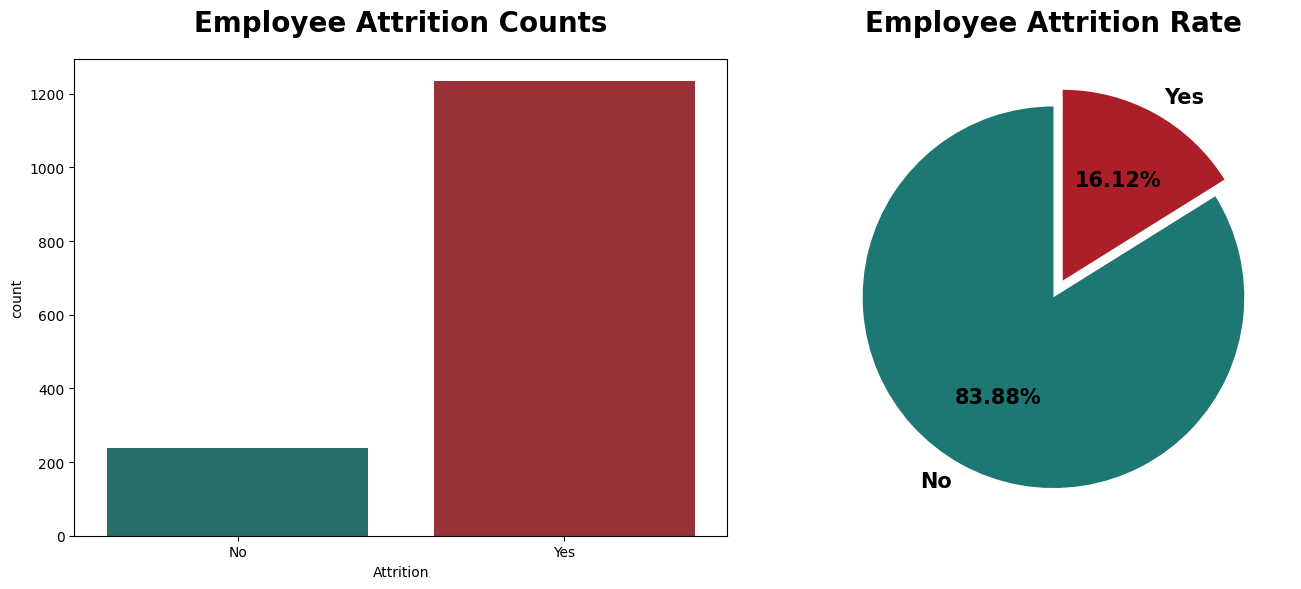

In [125]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)
ax = sns.countplot(data=E_DF,x='Attrition',palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
ax.set_xticklabels(['No','Yes'])
plt.subplot(1,2,2)
plt.pie(E_DF['Attrition'].value_counts(),
        labels=['No','Yes'],autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=20)
plt.tight_layout()
plt.show()

<h4>💬 Notes:  

- Employee Attrition rate is higher than normal [4-6%] = 16.12%. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">2. Analyzing Employee Attrition by Gender.</h3>


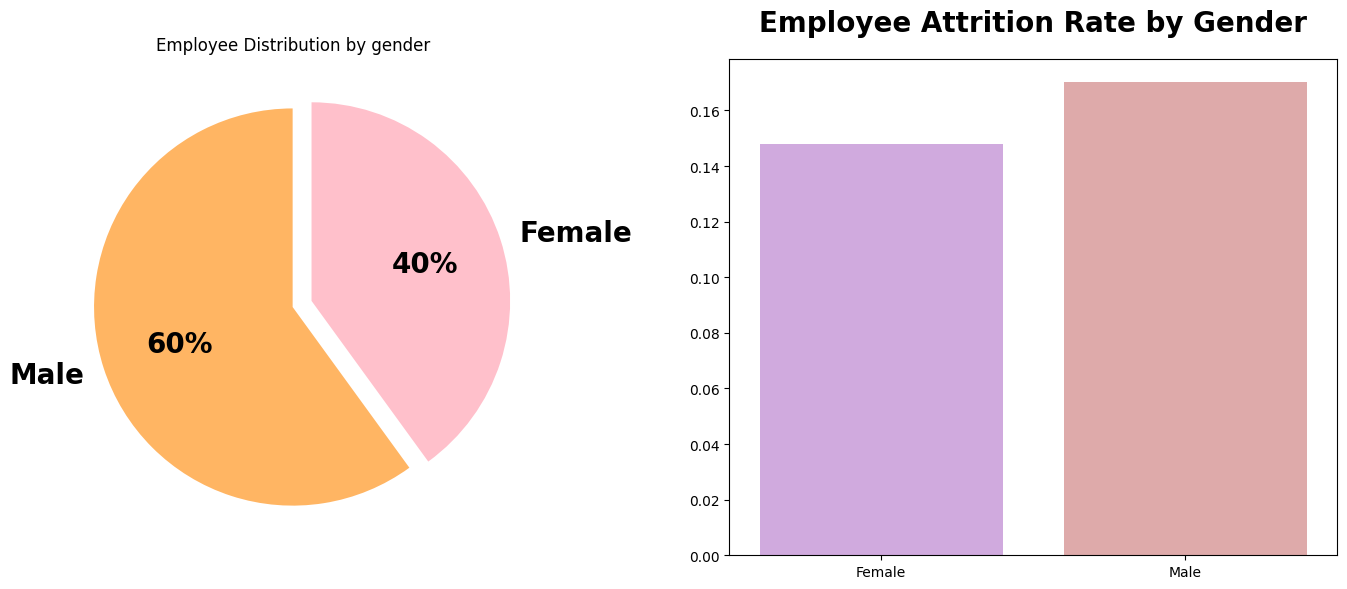

In [128]:
# Attrition VS Gender 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Employee Distribution by gender')
plt.pie(data=E_DF,x=E_DF.Gender.value_counts(),autopct="%0.0f%%",labels=df.Gender.value_counts().index,
        textprops=({"fontweight":"black","size":20}),
        explode=[0,0.1],startangle=90,colors= ["#ffb563","#FFC0CB"])
plt.subplot(1,2,2)
att_rate_byGender = E_DF.groupby(['Gender'])['NumericAttrtion'].mean().reset_index()
sns.barplot(data=att_rate_byGender,x='Gender',y='NumericAttrtion',palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by Gender",fontweight="black",size=20,pad=20)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()
# E_DF.NumericAttrtion

<h4>💬 Notes:  

- Most of Employee leaving the company are **Male**.
- **Female** employess count are less than males in the company. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">3. Analyzing Employee Attrition by Age.</h3>

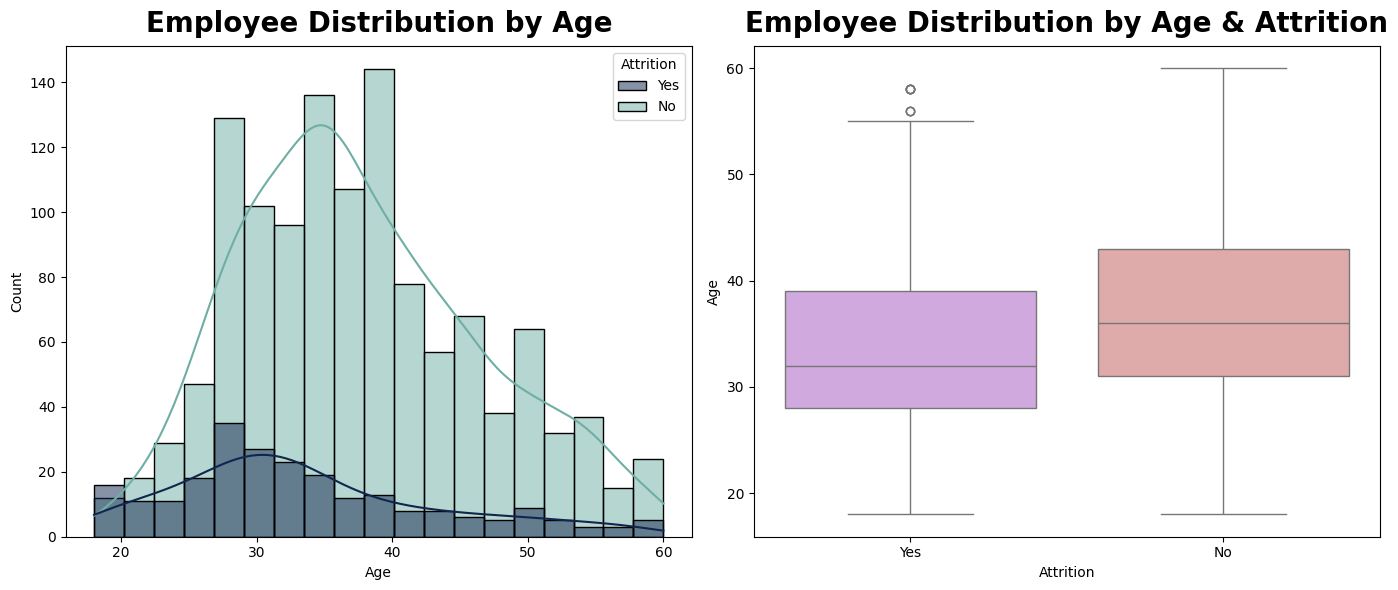

In [129]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Employee Distribution by Age",fontweight="black",size=20,pad=10)
sns.histplot(data=E_DF,x='Age',hue='Attrition',kde=True,palette=["#11264e","#6faea4"])
plt.subplot(1,2,2)
sns.boxplot(data=E_DF,x='Attrition',y='Age',palette=["#D4A1E7","#E7A1A1"])
plt.title("Employee Distribution by Age & Attrition",fontweight="black",size=20,pad=10)
plt.tight_layout()
plt.show()

<h4>💬 Notes:  

- Most of Employee age is between **30-40**.
- Younger employees tend more to Attrition. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">4. Analyzing Employee Attrition by Business Travel.</h3>


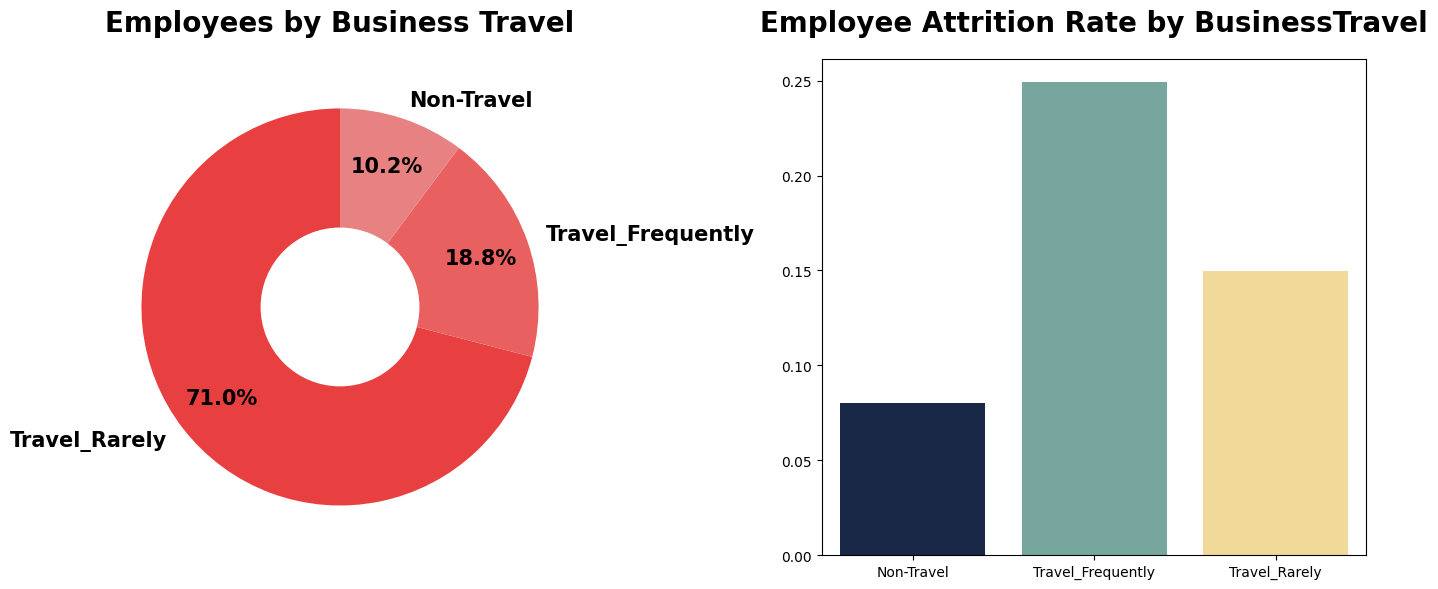

In [132]:
# Attrition VS business Travel 
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(data=E_DF,x=E_DF.BusinessTravel.value_counts(),labels=E_DF.BusinessTravel.value_counts().index,
        autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)


plt.subplot(1,2,2)
att_rate = E_DF.groupby(['BusinessTravel'])['NumericAttrtion'].mean().reset_index()
att_rate.columns = ['BusinessTravel', 'AttritionRate']

sns.barplot(data=att_rate,x='BusinessTravel',y='AttritionRate',palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by BusinessTravel",fontweight="black",size=20,pad=20)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

<h4>💬 Notes:  

- Most of the employees in the organization Travel Rarely.
- **Travel frequently** employess are more tending for Attrition. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">5. Analyzing Employee Attrition by Department.</h3>


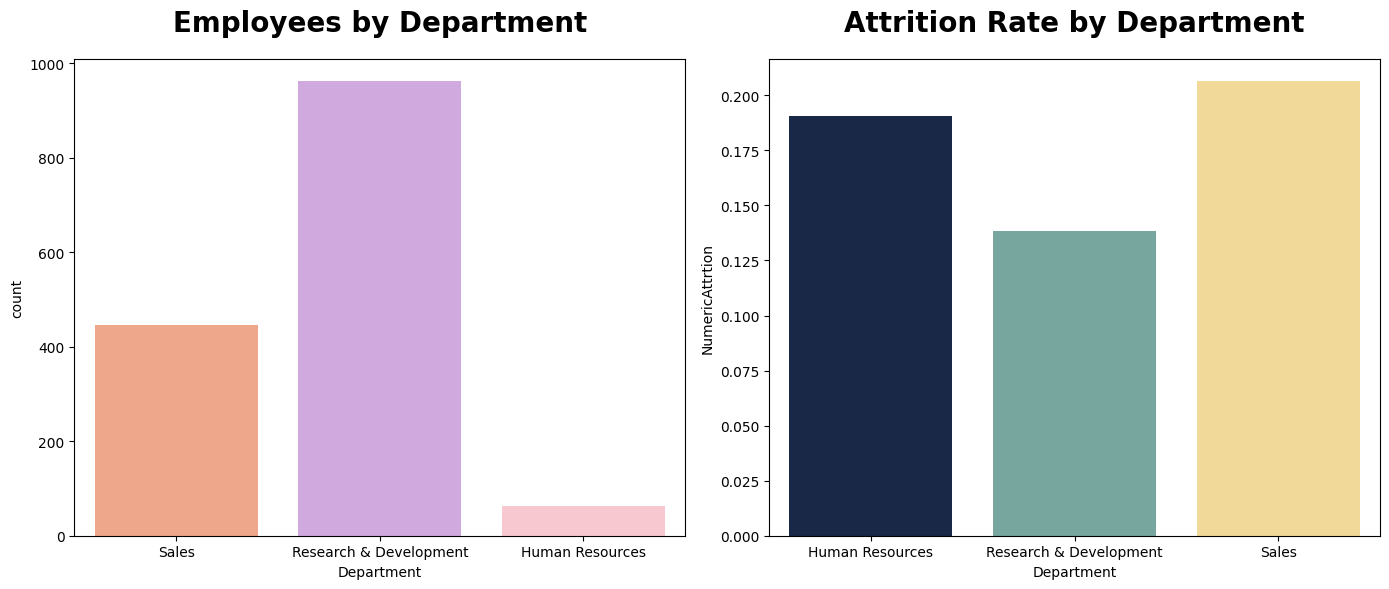

In [134]:
# Attrition VS Department
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Employees by Department",fontweight="black",size=20,pad=20)
sns.countplot(data=E_DF,x='Department',palette = ["#FFA07A", "#D4A1E7", "#FFC0CB"])

plt.subplot(1,2,2)
att_rate = E_DF.groupby(['Department'])['NumericAttrtion'].mean().reset_index()
sns.barplot(data=att_rate,x='Department',y='NumericAttrtion',palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Attrition Rate by Department",fontweight="black",size=20,pad=20)
plt.tight_layout()
plt.show()

<h4>💬 Notes:  

- Most of the employees are from Research & Development Department.
- Highest Attrition is in the Sales Department, then Human resources comes second place. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">6. Analyzing Employee Attrition by DailyRate Group.</h3>


In [135]:
# Attrition VS DailyRate

# Daily Rate Group  
# bins for groups
bin_edges = [0,500,1000,15000]
# labels for groups
labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

E_DF['DailyRateGroup'] = pd.cut(E_DF['DailyRate'], bins=bin_edges, labels=labels)


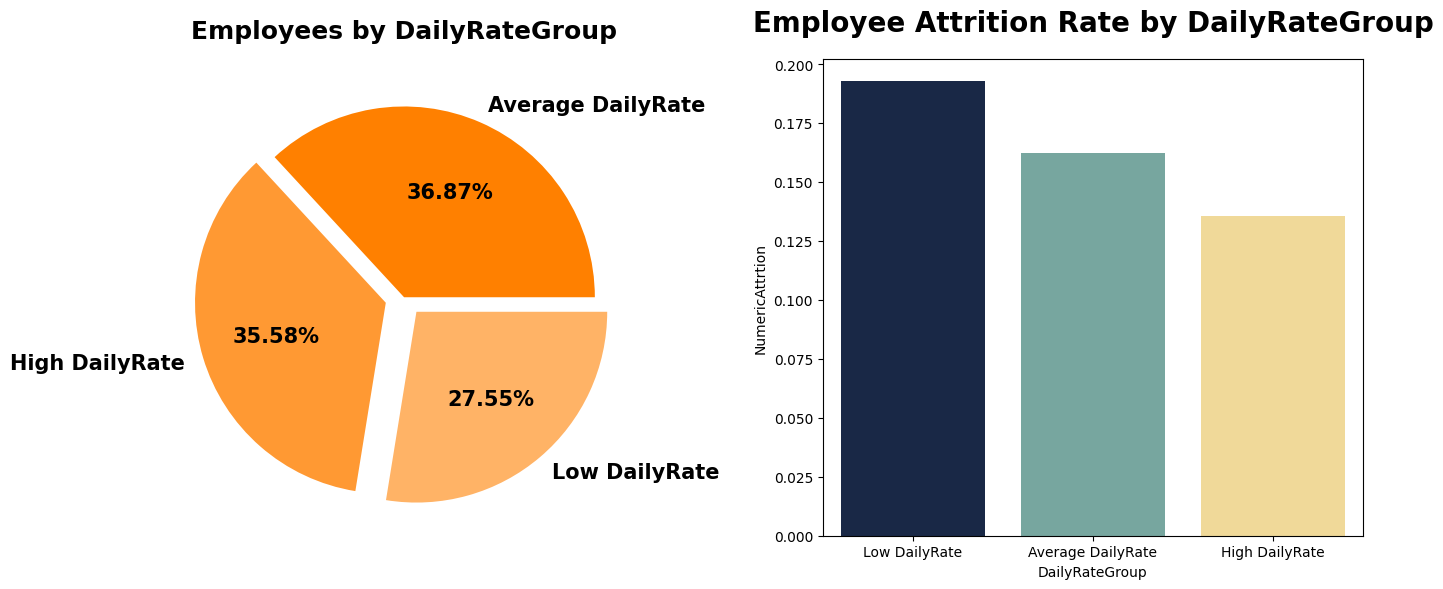

In [136]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Employees by DailyRateGroup",fontweight="black",pad=15,size=18)
plt.pie(data=E_DF, x=E_DF.DailyRateGroup.value_counts(),
        labels=df.DailyRateGroup.value_counts().index,
        autopct="%.2f%%",textprops={"fontweight":"black","size":15},
        explode=[0,0.1,0.1],colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'])

plt.subplot(1,2,2)
att_rate = E_DF.groupby(['DailyRateGroup'])['NumericAttrtion'].mean().reset_index()
sns.barplot(data=att_rate,x='DailyRateGroup',y='NumericAttrtion',palette=["#11264e","#6faea4","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup",fontweight="black",size=20,pad=20)
plt.tight_layout()
plt.show()

<h4>💬 Notes:  

- Most of the employees work Average DAily Rate.
- Highest Attrition Rate with Low daily rate employees. </h4>


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;"> 6. Analyzing Employee Attrition by Distance From Home.</h3>


In [137]:
# Binning of DistanceFromHome col.
D = E_DF.DistanceFromHome.nunique()
print("Distance from home unique vlues = ",D)

# Define the bin edges for the groups
bins_edges = [0,2,5,10,30]
# Define bins labels
bins_labels = ['0-2 Kms', '3-5 Kms', '6-10 kms', '+ 10 Kms']

E_DF['DistanceFHGroup'] = pd.cut(E_DF['DistanceFromHome'],bins=bins_edges, labels=bins_labels)



Distance from home unique vlues =  29


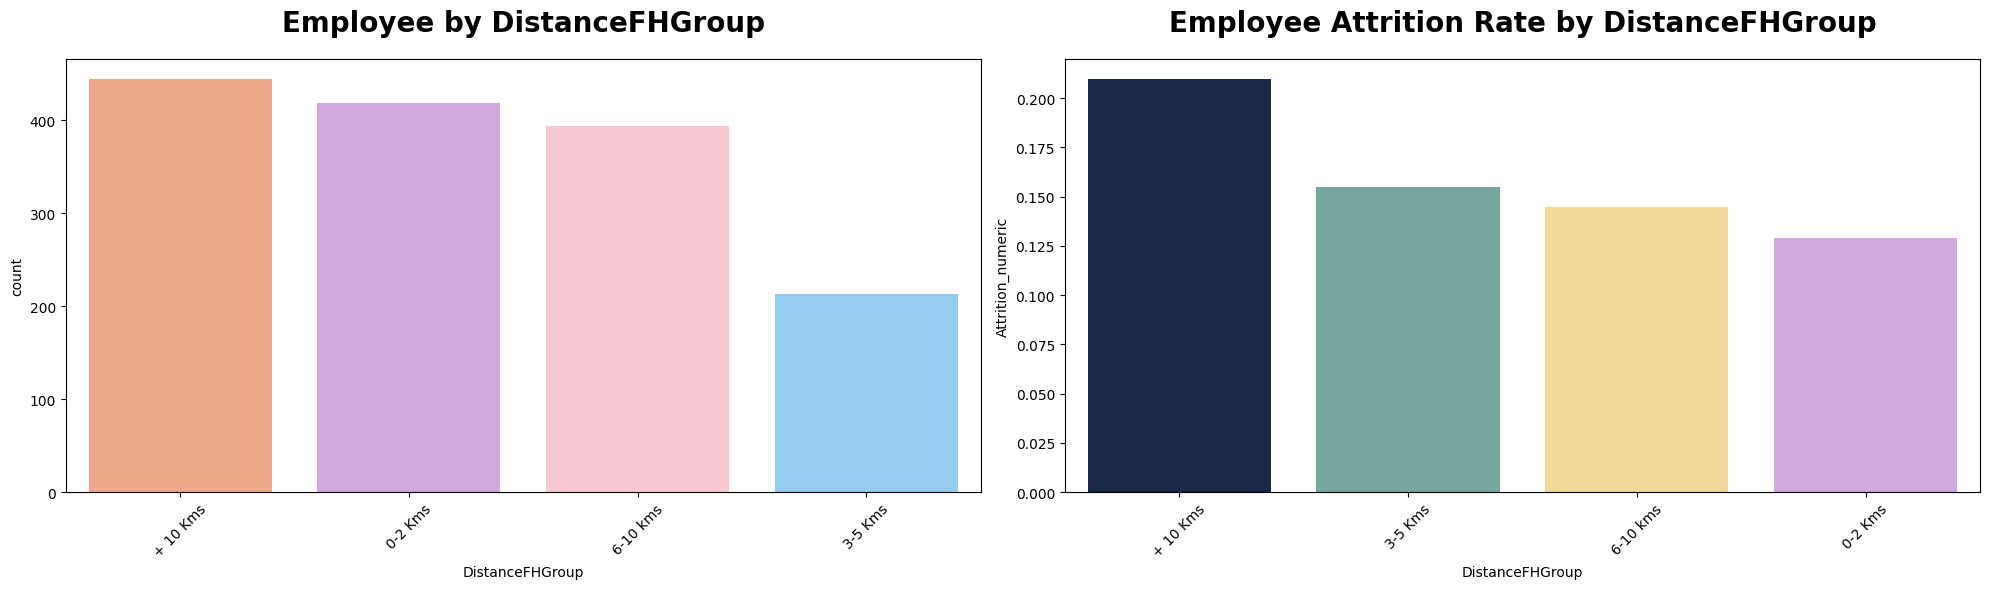

In [138]:
pick_plot(plotType=[2,3] ,col='DistanceFHGroup',DF= E_DF,c1=["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees are living far far from the company.
- Attrition rate decreases as the Distance from home decreases.. </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;"> 6. Analyzing Employee Attrition by Education.</h3>


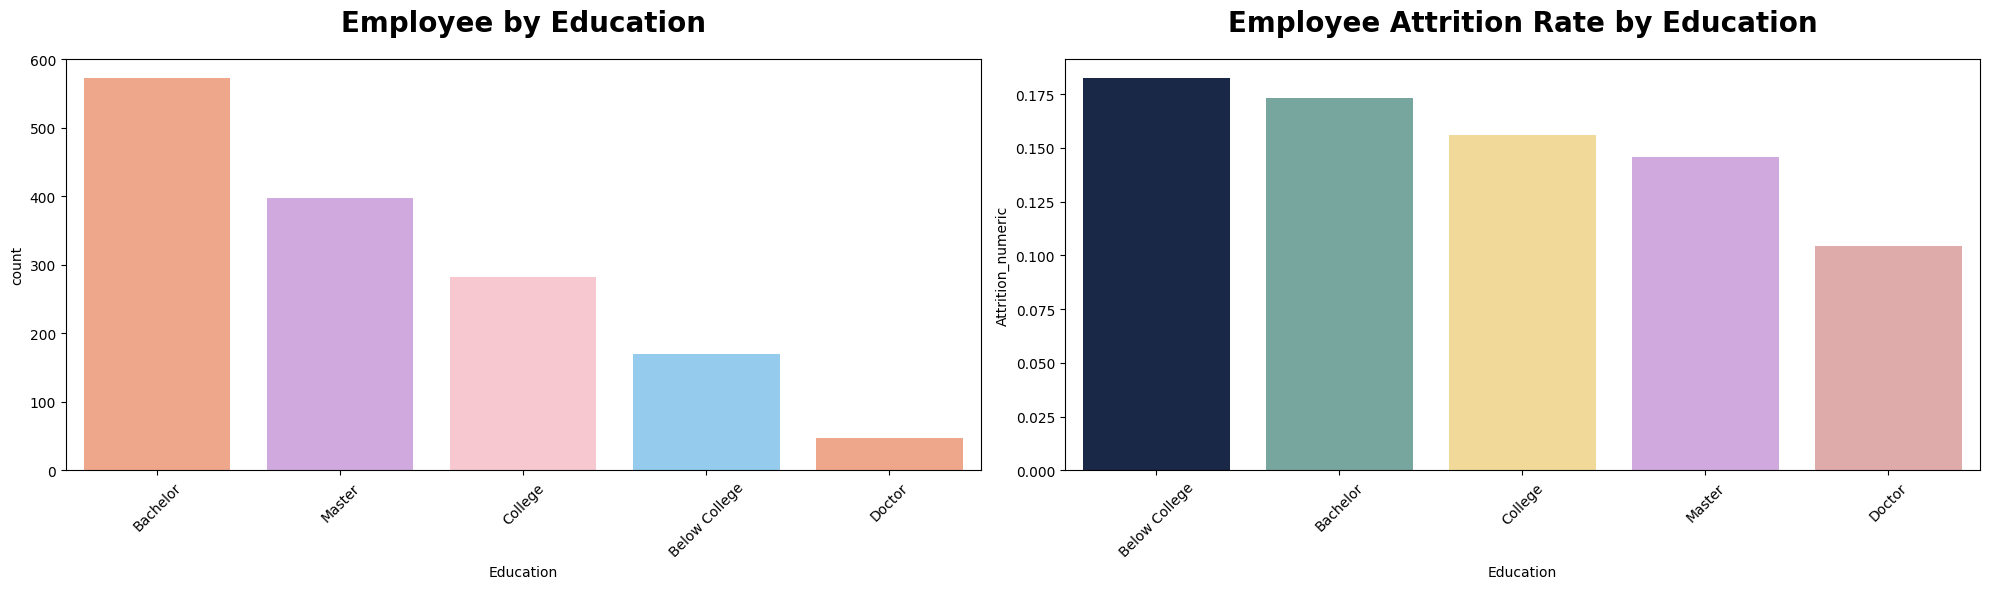

In [139]:
DFtmp = E_DF
DFtmp.Education = DFtmp.Education.map({
    1 : 'Below College',
    2 : 'College',
    3 : 'Bachelor',
    4 : 'Master',
    5 : 'Doctor'
})

pick_plot(plotType=[2,3] ,col='Education',DF= DFtmp,c1=["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees completed Bschs & Master Degrees.
- Highest Attrition Rate is from Below college Employees . </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;"> 8. Analyzing Employee Attrition by Education Field. </h3>


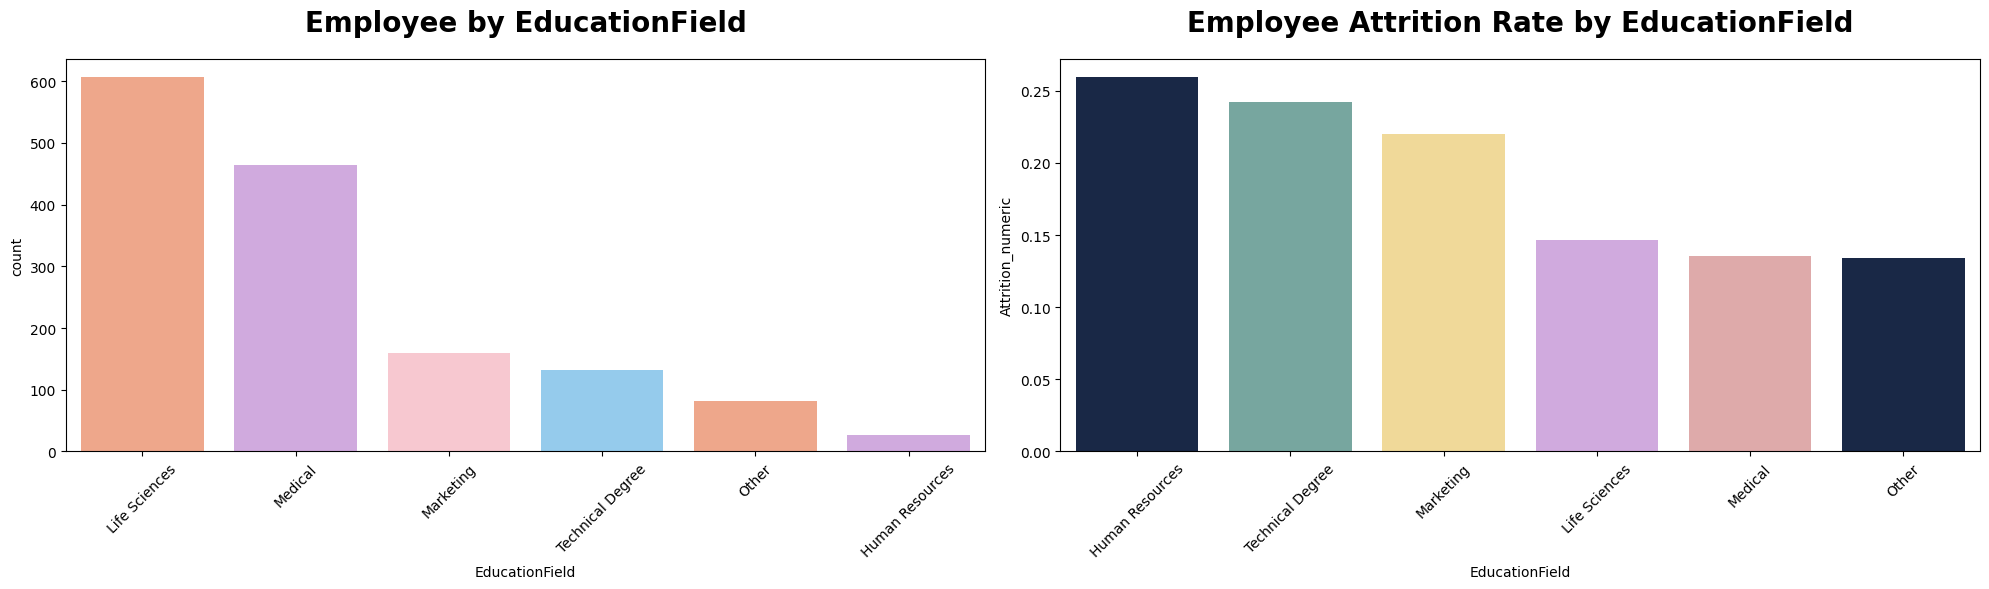

In [140]:
pick_plot(plotType=[2,3] ,col='EducationField',DF=E_DF,c1=["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees are either from Life Science or Medical Education Field.
- Human Resources, Marketing, Technical is having very high attrition rate. </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
9. Analyzing Employee Attrition by Environment Satisfaction.
</h3>

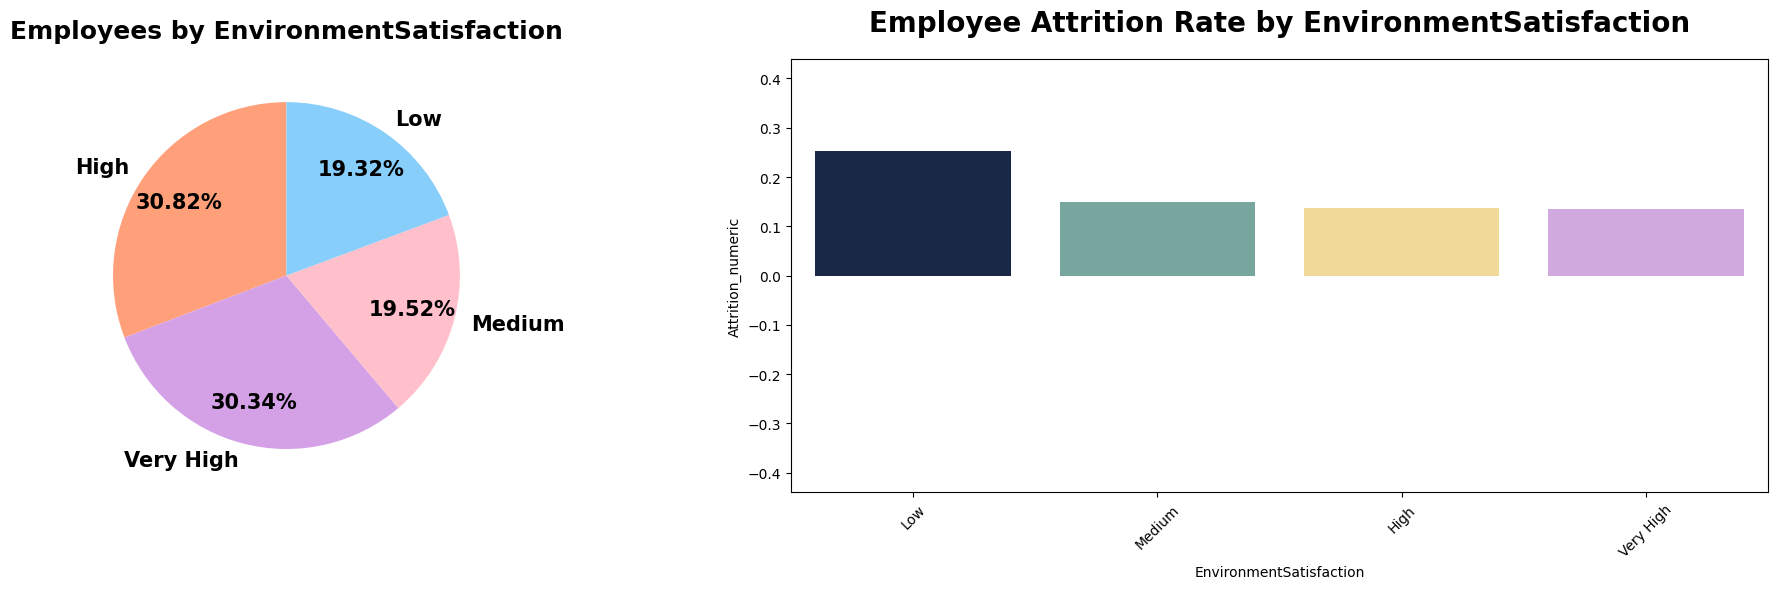

In [141]:
DFtmp = E_DF
DFtmp.EnvironmentSatisfaction = DFtmp.EnvironmentSatisfaction.map({
    1 : 'Low',
    2 : 'Medium',
    3 : 'High',
    4 : 'Very High',
})

pick_plot(plotType=[1,3] ,col='EnvironmentSatisfaction',DF=DFtmp,c1=["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees Environment Rating of the comapny are High & Very High.
- Attrition Rate Decreases with increase in level of environment satisfication.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
10. Analyzing Employee Attrition by Job Roles.
</h3>


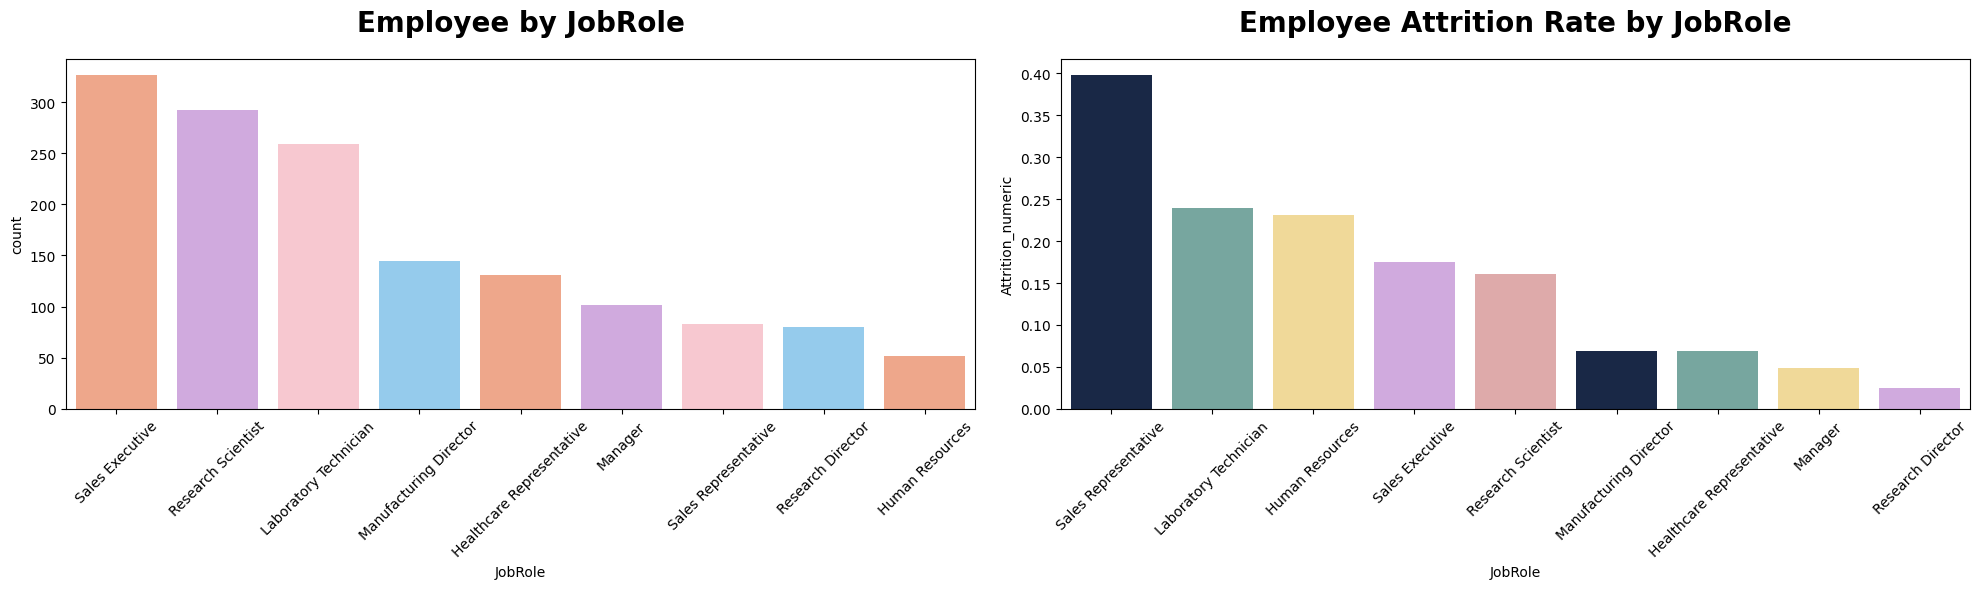

In [142]:
pick_plot(plotType=[2,3] ,col='JobRole',DF=E_DF,c1=["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])


<h4>💬 Notes:  

- Most employees is working as Sales executive, Research Scientist or Laboratory Technician.
- Highest attrition rates are in sector of Research Director, Sales Executive, Research Scientist.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
11. Analyzing Employee Attrition by Job Level.
</h3>


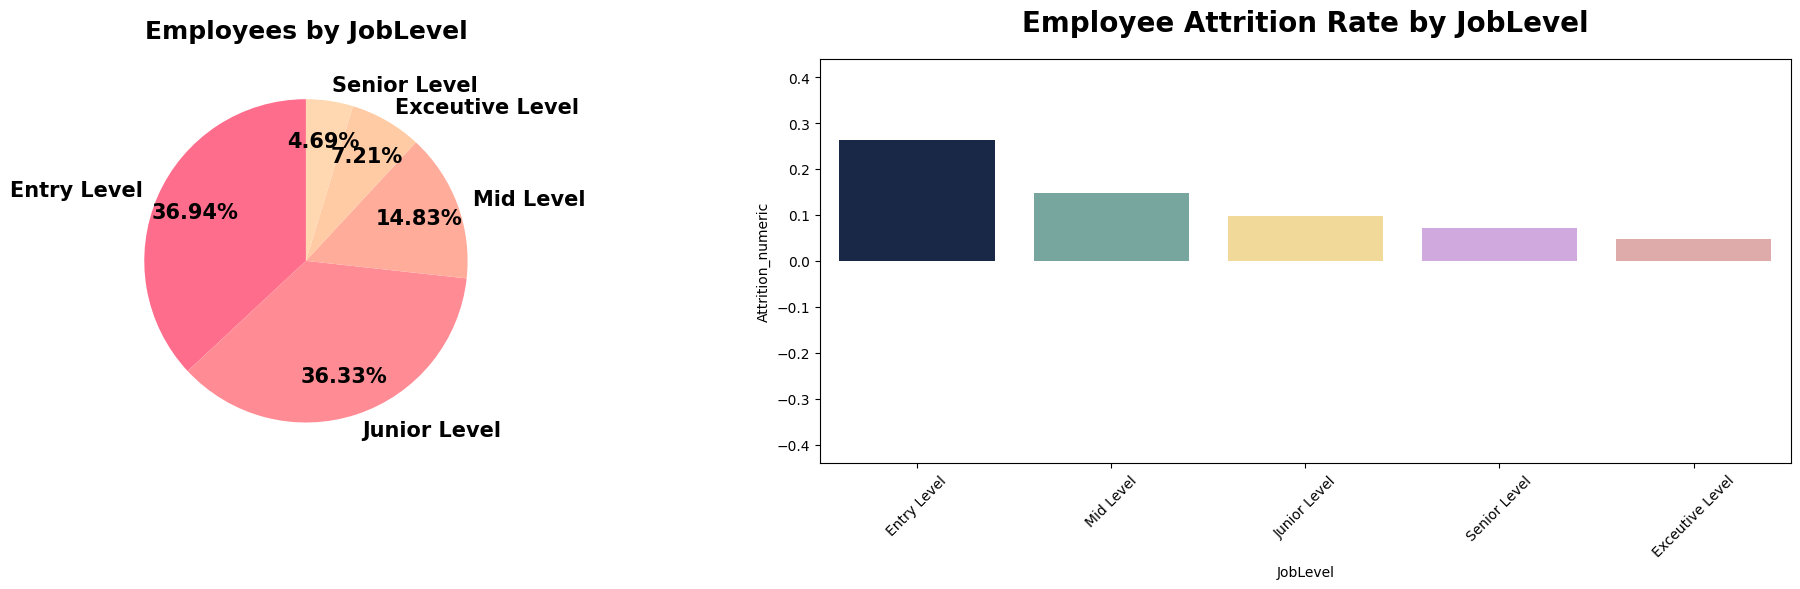

In [143]:
DFtmp = E_DF
DFtmp.JobLevel = DFtmp.JobLevel.map({
    1 : 'Entry Level',
    2 : 'Junior Level',
    3 : 'Mid Level',
    4 : 'Exceutive Level',
    5 : 'Senior Level'
})
pick_plot(plotType=[1,3] ,col='JobLevel',DF=DFtmp,
          c1=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],
          c2 = ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees in the organization are at Entry Level or Junior Level.
- Highest Attrition is at the Entry Level.
- As the level increases the attrition rate decreases.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
12. Analyzing Employee Attrition by Job Satisfaction.
</h3>


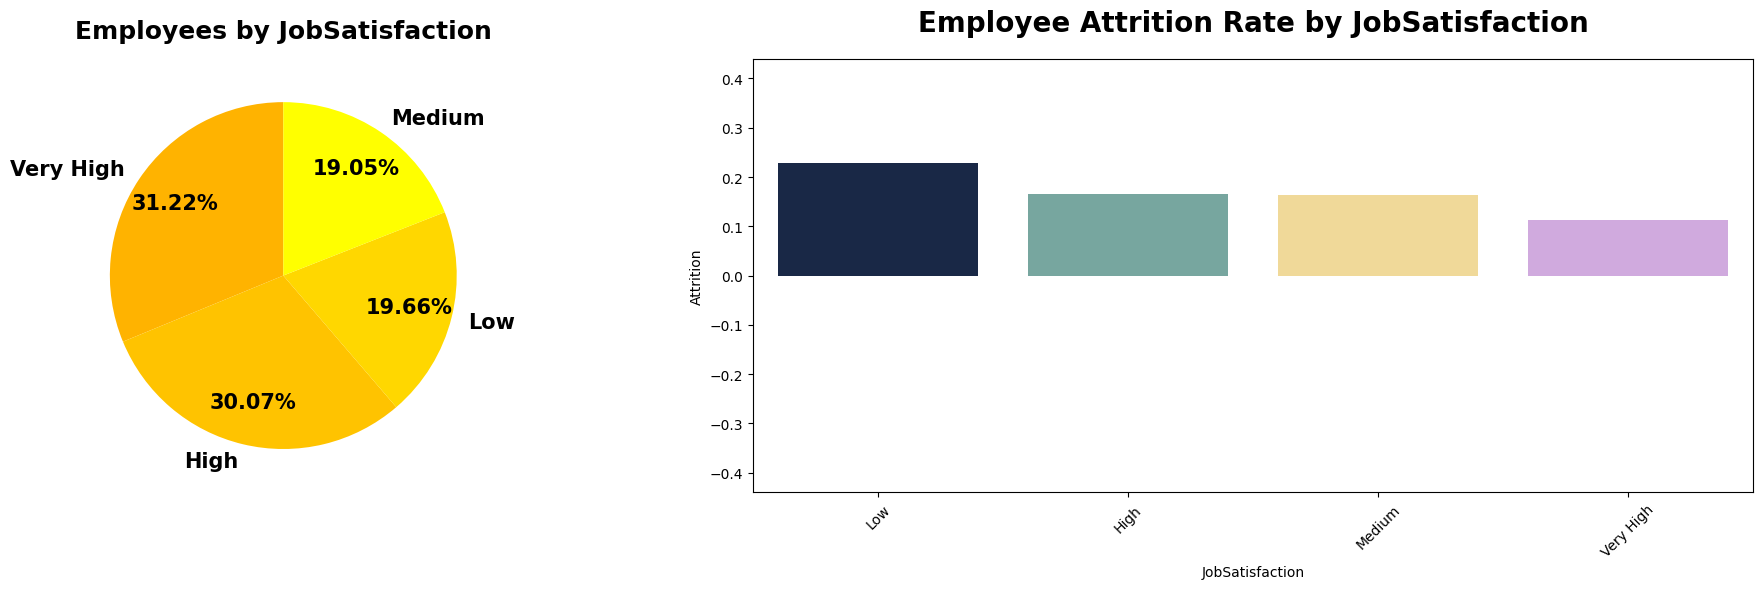

In [39]:
DFtmp = E_DF
DFtmp.JobSatisfaction = DFtmp.JobSatisfaction.map({
    1 : 'Low',
    2 : 'Medium',
    3 : 'High',
    4 : 'Very High',
})

pick_plot(plotType=[1,3] ,col='JobSatisfaction',DF=DFtmp,
          c1=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],
          c2=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees have rated their job satisfaction as high or very high.
- Employees who rated their job satisfaction low are mostly leaving the organization.
- All the categories in job satisfaction is having high attrition rate. </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
13. Analyzing Employee Attrition by Marital Status.
</h3>


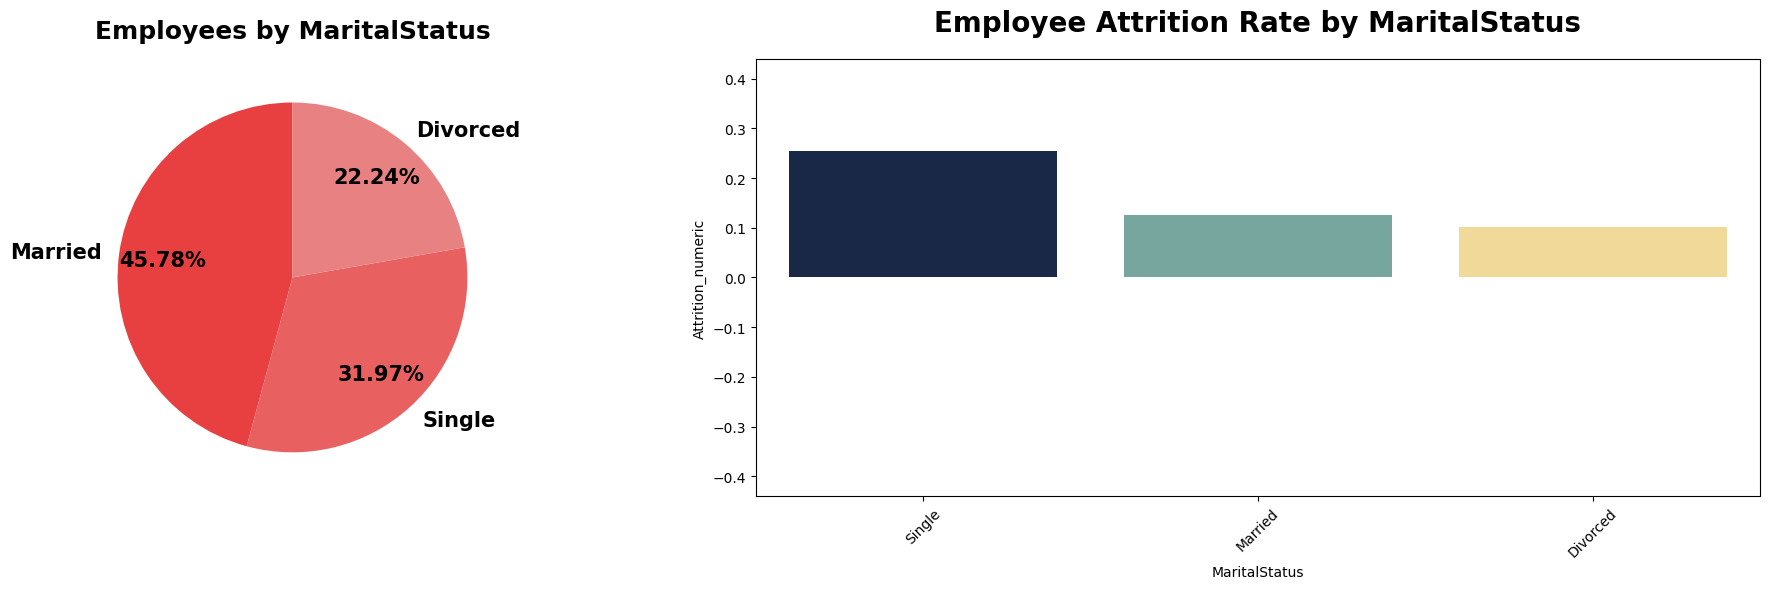

In [144]:
pick_plot(plotType=[1,3] ,col='MaritalStatus',DF=E_DF,
          c1=['#E84040', '#E96060', '#E88181', '#E7A1A1'],
          c2=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees are Married in the organization.
- The attrition rate is very high of employees who are divorced.
- The attrition rate is low for employees who are single.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
14. Analyzing Employee Attrition by Monthly Income.
</h3>


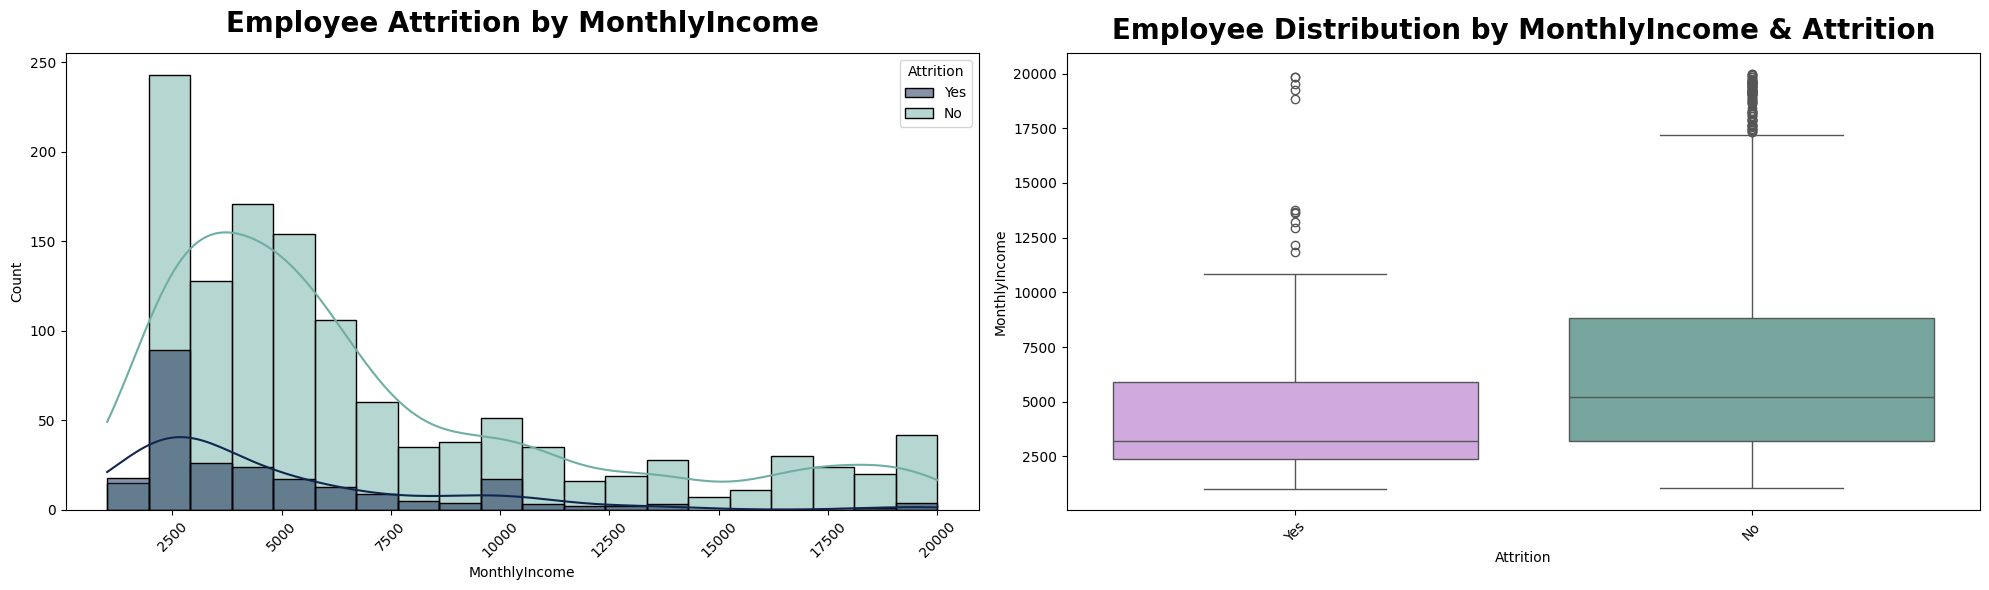

In [145]:
pick_plot(plotType=[4,5] ,col='MonthlyIncome',DF=E_DF,
          c1=["#11264e","#6faea4"],
          c2 =["#D4A1E7","#6faea4"])

<h4>💬 Notes:  

- Most of the employees are getting paid less than 10000 in the organiation.
- The average monthly income of employee who have left is comparatively low with employee who are still working.
- As the Monthly Income increases the attrition decreases.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
15. Analyzing Employee Attrition by Monthly Rate.
</h3>


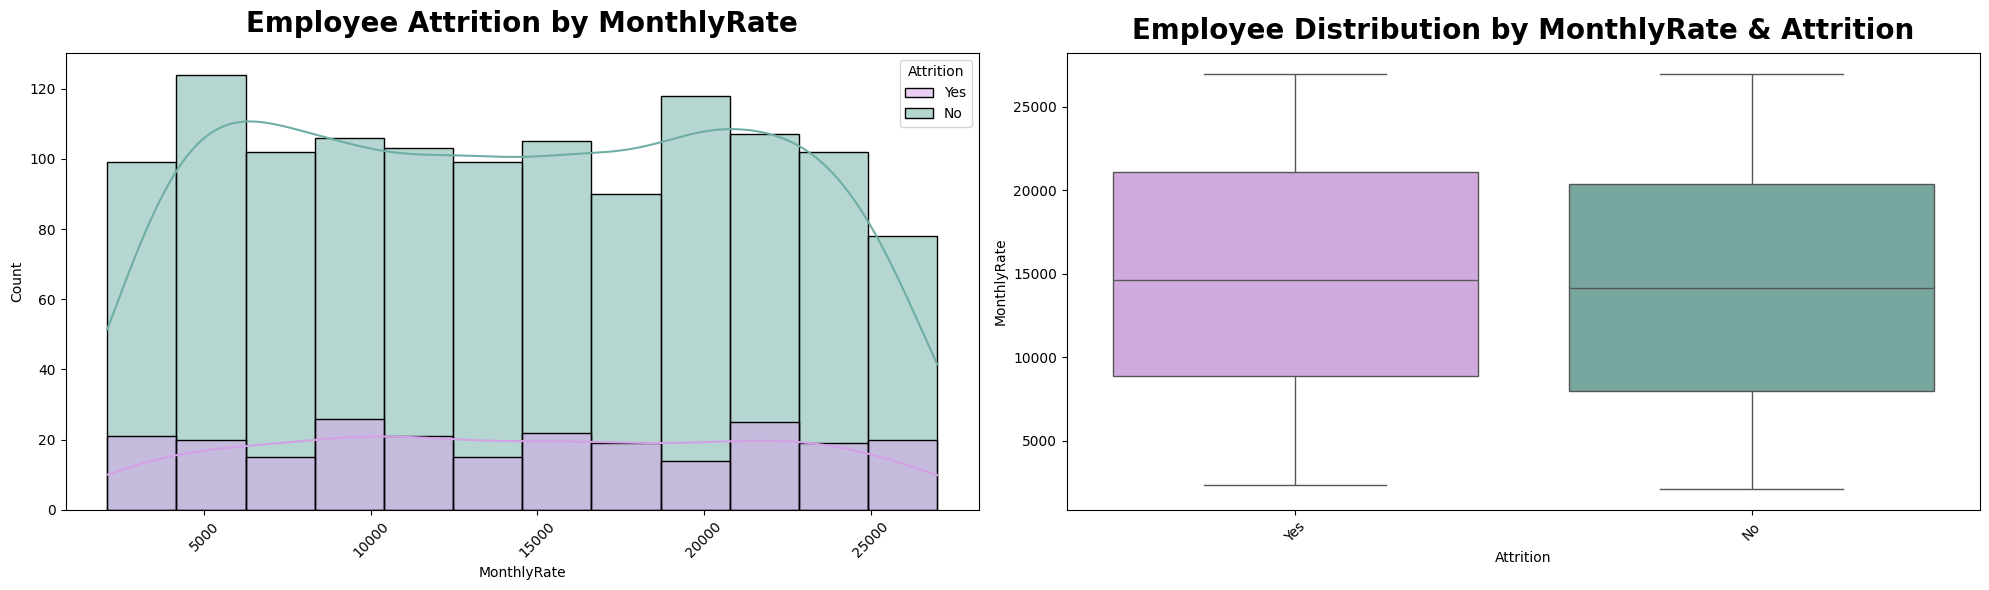

In [146]:
pick_plot(plotType=[4,5] ,col='MonthlyRate',DF=E_DF,
          c1=["#D4A1E7","#6faea4"],
          c2 =["#D4A1E7","#6faea4"])

<h4>💬 Notes:  

- The distribution of MonthlyRate is similar througout the column.
- Monthly Income feature doesn't provide any meaningful insights in the employee attrition.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
16. Analyzing Employee Attrition by Number of Companies Worked.
</h3>


In [43]:
# Binning of Num of Companies Worked col.
D = E_DF.NumCompaniesWorked.nunique()
print("Num of Companies Worked unique vlues = ",D)
E_DF["NumCompaniesWorked"].describe().to_frame().T

Num of Companies Worked unique vlues =  10


count      mean       std  min  25%  50%  75%  max
NumCompaniesWorked  1470.0  2.693197  2.498009  0.0  1.0  2.0  4.0  9.0

In [147]:
# Define the bin edges for the groups
bins_edges = [0,1,3,5,10]
# Define bins labels
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]
# Cut the DailyRate column into groups
E_DF['NumCompaniesWorkedGroup'] = pd.cut(E_DF['NumCompaniesWorked'],bins=bins_edges, labels=bin_labels)

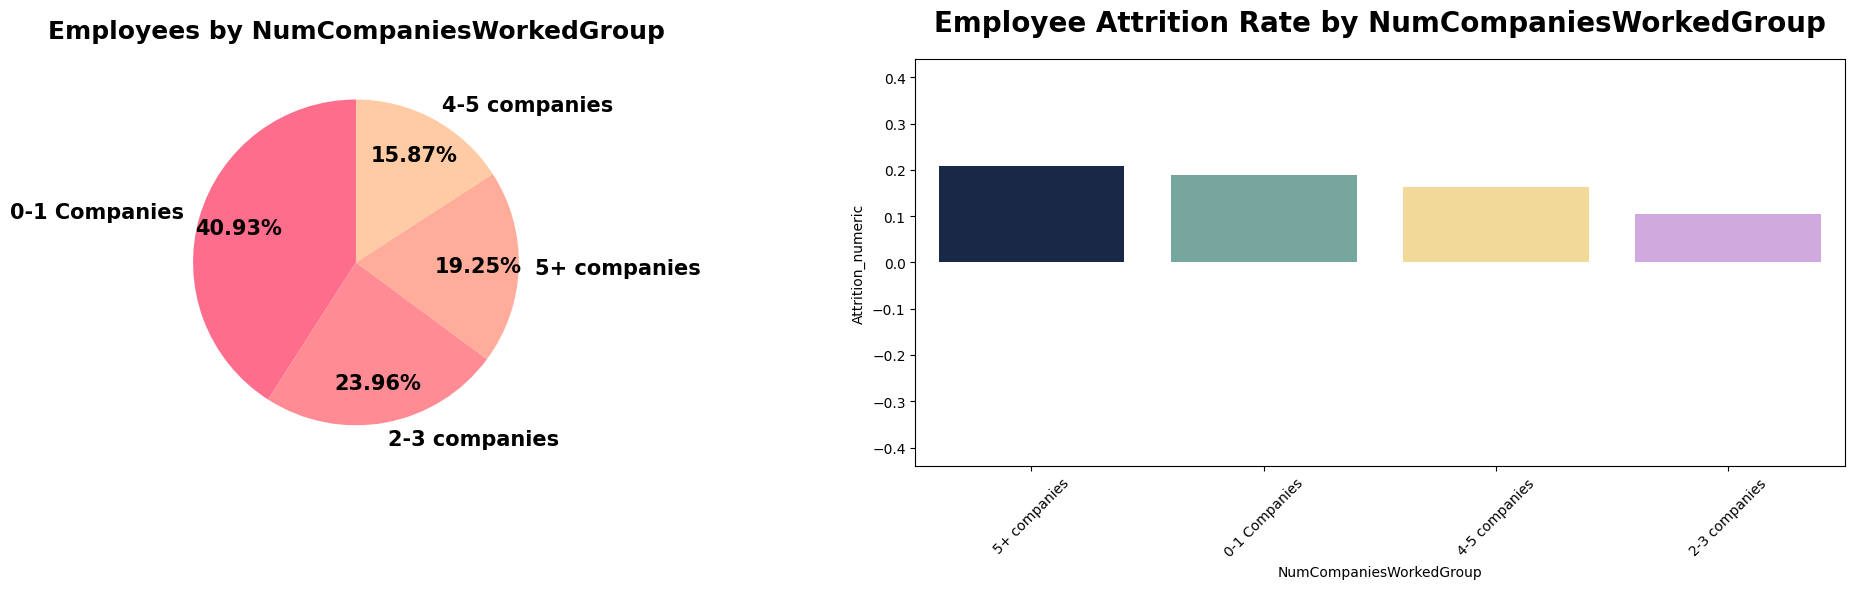

In [148]:
pick_plot(plotType=[1,3] ,col='NumCompaniesWorkedGroup',DF=E_DF,
          c1=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees have worked for less than 2 companies.
- Highest attrition rate of employees who worked for less than 5 companies.
 </h4>
    

<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
17. Analyzing Employee Attrition by Over Time.
</h3>


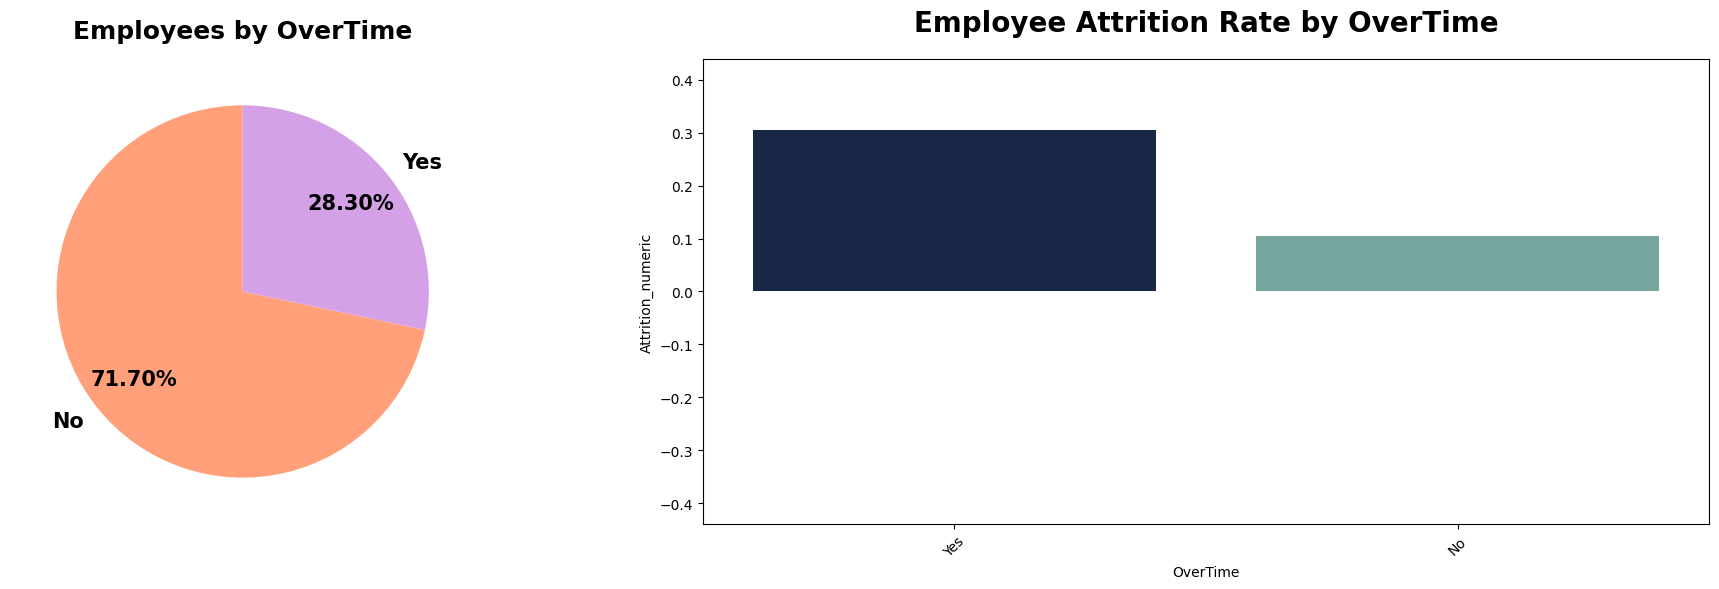

In [149]:
pick_plot(plotType=[1,3] ,col='OverTime',DF=E_DF,
          c1=["#FFA07A", "#D4A1E7"],
          c2 =["#11264e","#6faea4"])

<h4>💬 Notes:  

- Most of the employees doesn't work for OverTime.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
18. Analyzing Employee Attrition by Percentage Salary Hike.
</h3>


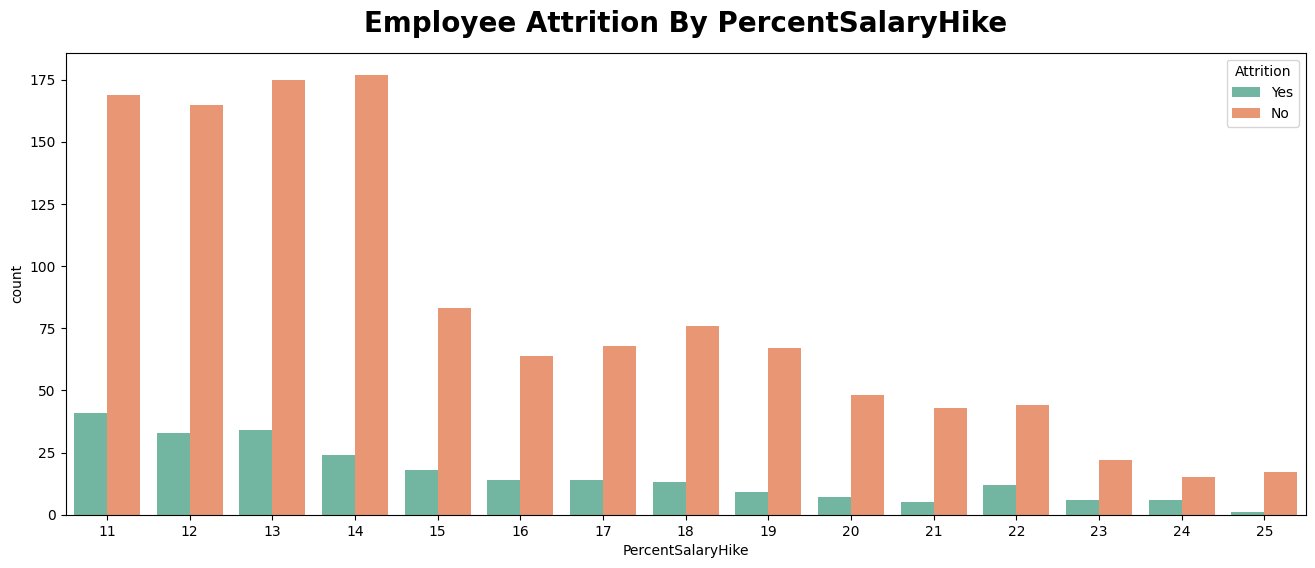

In [150]:
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=E_DF, palette='Set2')
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

<h4>💬 Notes:  

- Very Few employees are getting a high percent dalary hike.
- As the amount of percent salary increases the attrition rate decreases.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
19. Analyzing Employee Attrition by Performance Rating.
</h3>


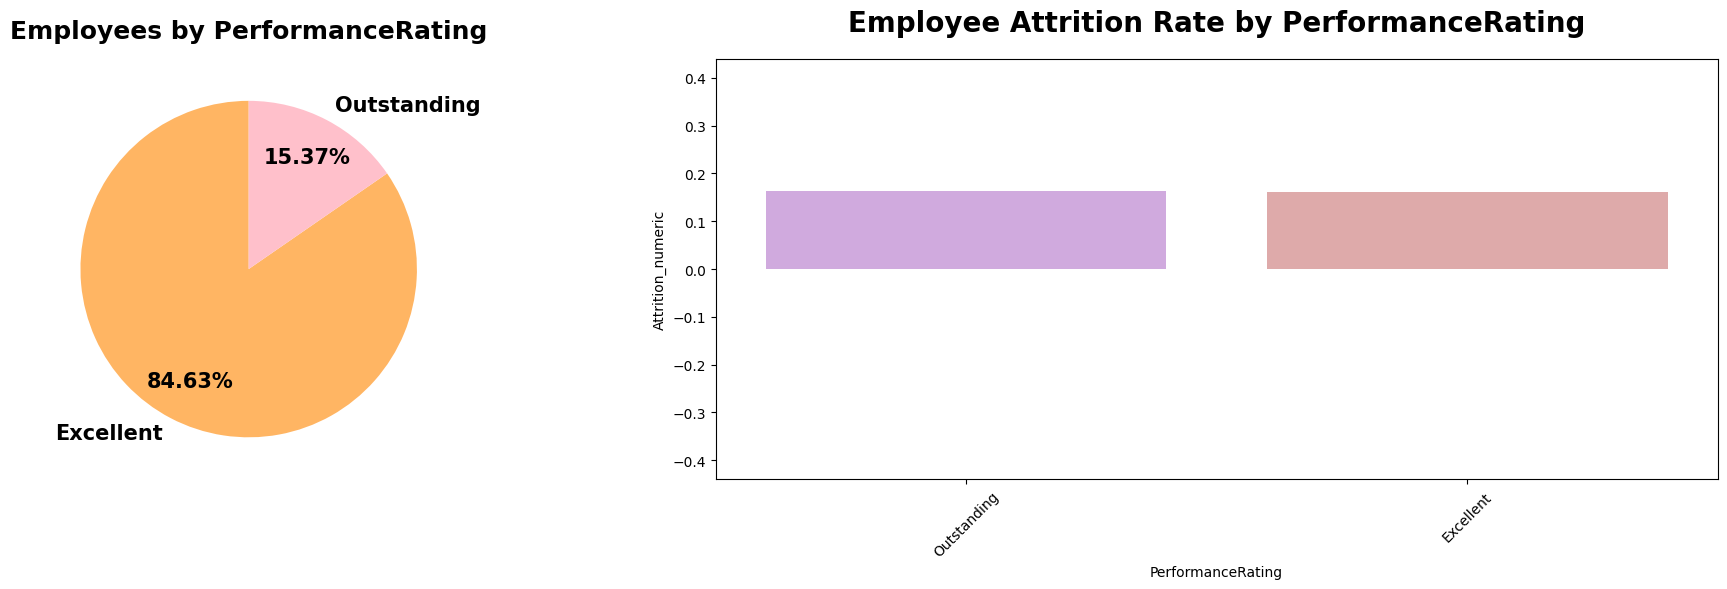

In [151]:
DFtmp = E_DF
DFtmp.PerformanceRating = DFtmp.PerformanceRating.map({
    1 : 'Low',
    2 : 'Good',
    3 : 'Excellent',
    4 : 'Outstanding',
})
pick_plot(plotType=[1,3] ,col='PerformanceRating',DF=DFtmp,
          c1=["#ffb563","#FFC0CB"],
          c2 =["#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

-  Most of the employees are having excellent performance rating.
-  Both the categories in this field is having same attriton rate.
-  then, why we can't generate any meaningful inisghts.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
20. Analyzing Employee Attrition by Relationship Satisfaction.
</h3>


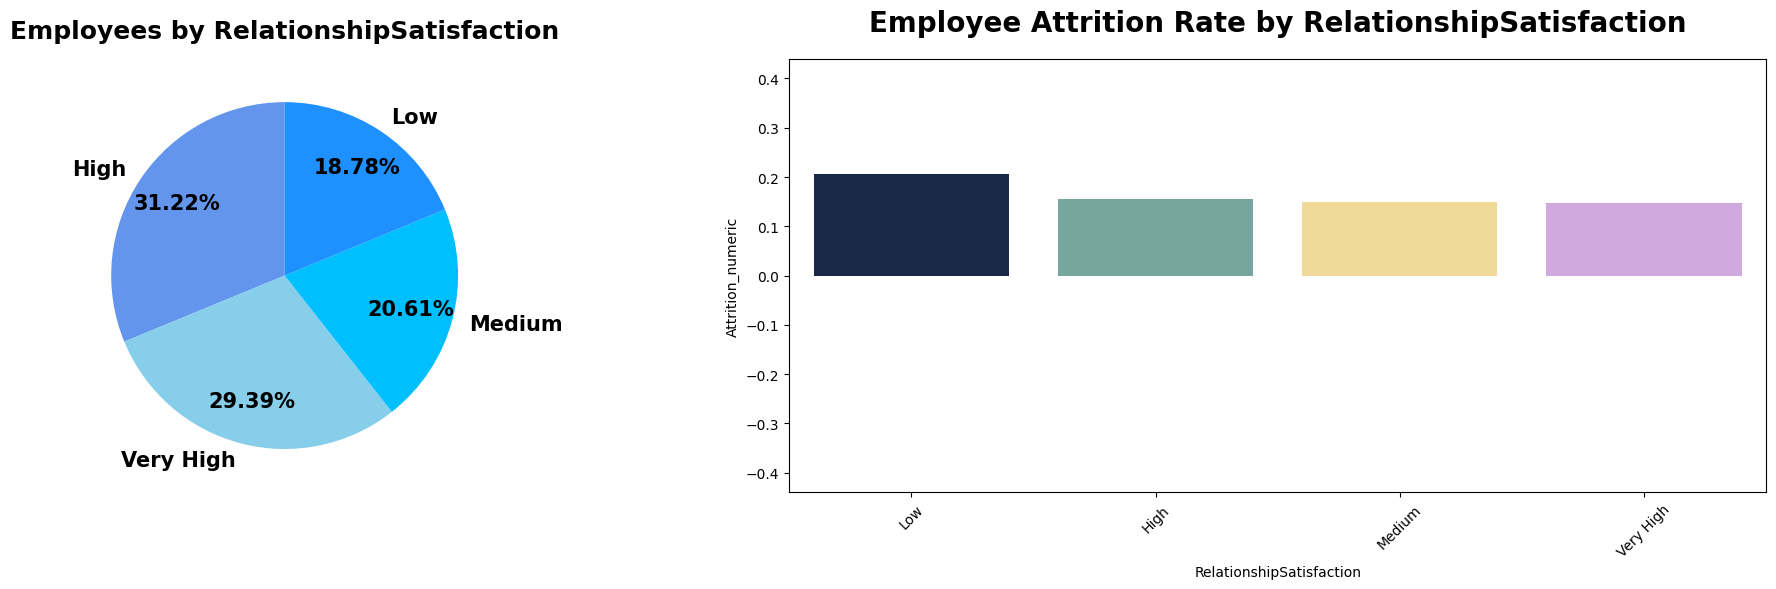

In [152]:
DFtmp = E_DF
DFtmp.RelationshipSatisfaction = DFtmp.RelationshipSatisfaction.map({
    1 : 'Low',
    2 : 'Medium',
    3 : 'High',
    4 : 'Very High',
})

pick_plot(plotType=[1,3] ,col='RelationshipSatisfaction',DF=DFtmp,
          c1=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees are having high or very high relationship satisfaction.
- Though the relationship satification is high there's a high attrition rate.
- All the categories in this feature is having a high attriton rate.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
20. Analyzing Employee Attrition by Work Life Balance.
</h3>


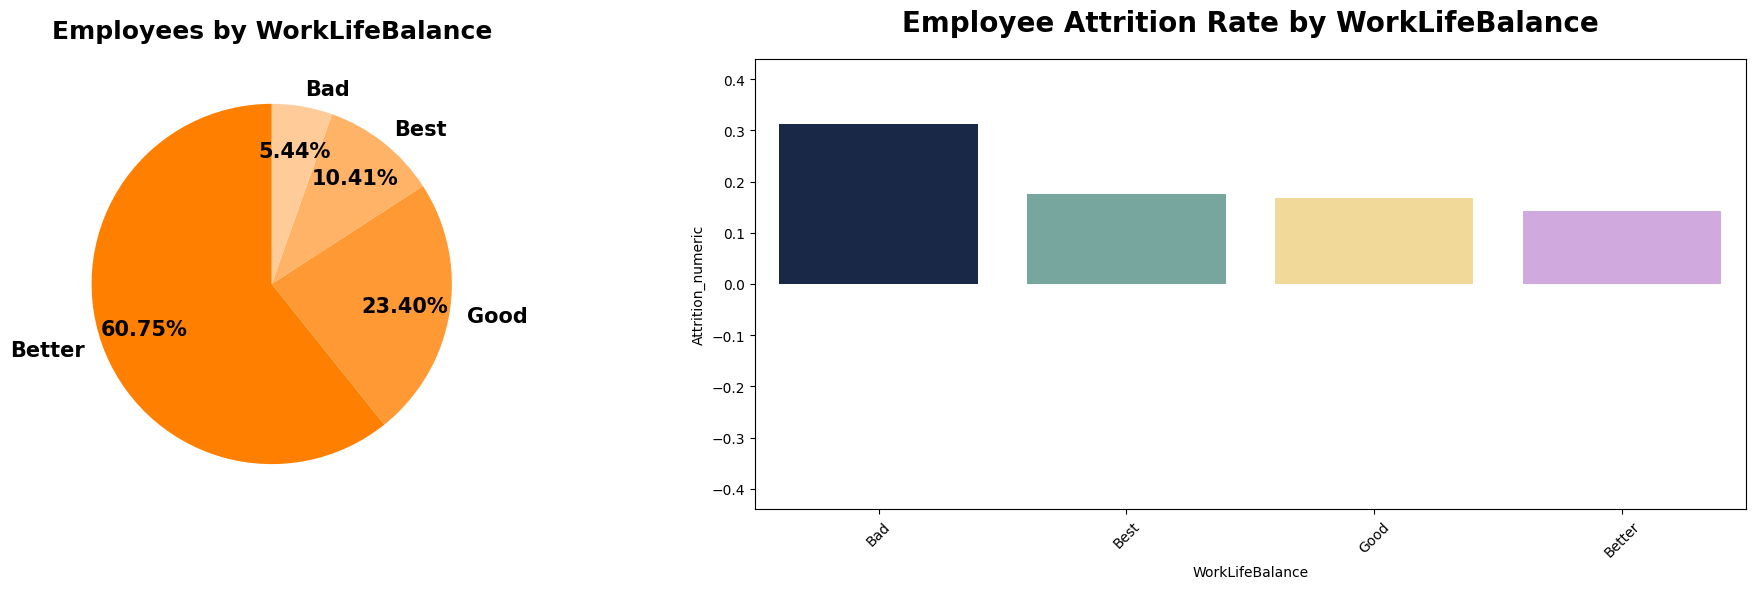

In [153]:
DFtmp = E_DF
DFtmp.WorkLifeBalance = DFtmp.WorkLifeBalance.map({
    1 : 'Bad',
    2 : 'Good',
    3 : 'Better',
    4 : 'Best',
})

pick_plot(plotType=[1,3] ,col='WorkLifeBalance',DF=DFtmp,
          c1=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- More than 60% of employees are having a better work life balance.
- Employees with Bad Work Life Balance is having Very High Attrition Rate.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
21. Analyzing Employee Attrition by Total Working Years.
</h3>


In [156]:
E_DF['TotalWorkingYears'].describe().to_frame().T



count       mean       std  min  25%   50%   75%   max
TotalWorkingYears  1470.0  11.279592  7.780782  0.0  6.0  10.0  15.0  40.0

In [158]:
# Define the bin edges for the groups
bins_edges = [0,5,10,20,50]
# Define bins labels
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]
# Cut the DailyRate column into groups
E_DF['TotalWorkingYearsGroup'] = pd.cut(E_DF['TotalWorkingYears'],bins=bins_edges, labels=bin_labels)

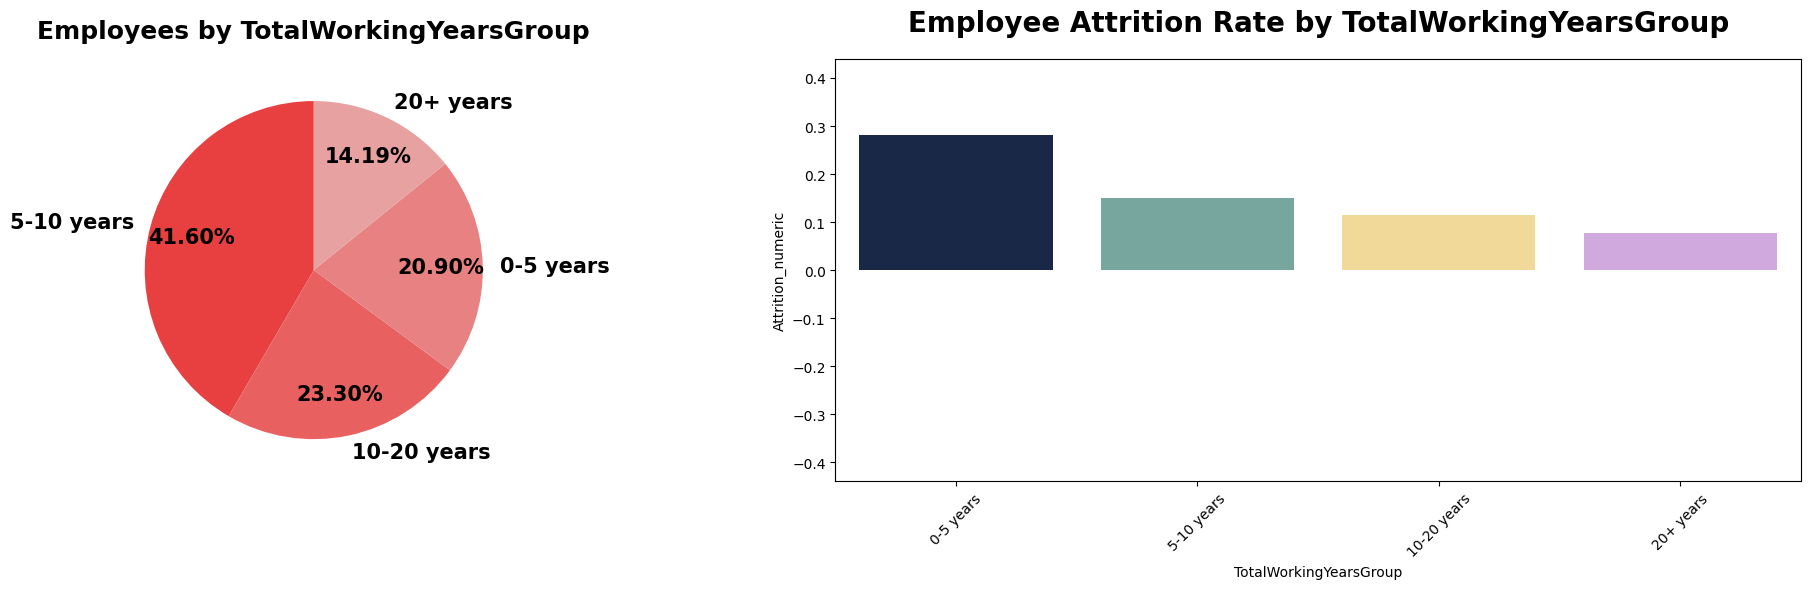

In [159]:
pick_plot(plotType=[1,3] ,col='TotalWorkingYearsGroup',DF=E_DF,
          c1=['#E84040', '#E96060', '#E88181', '#E7A1A1'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate is also **very high.
- Employee with working experience of less than 10 years are having High Attrition Rate
- Employee with working experience of more than 10 years are having Less Attrition Rate.

 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
22. Analyzing Employee Attrition by Years at Company.
</h3>


In [161]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

E_DF["YearsAtCompanyGroup"] = pd.cut(E_DF['YearsAtCompany'], bins=bin_edges, labels=bin_labels)

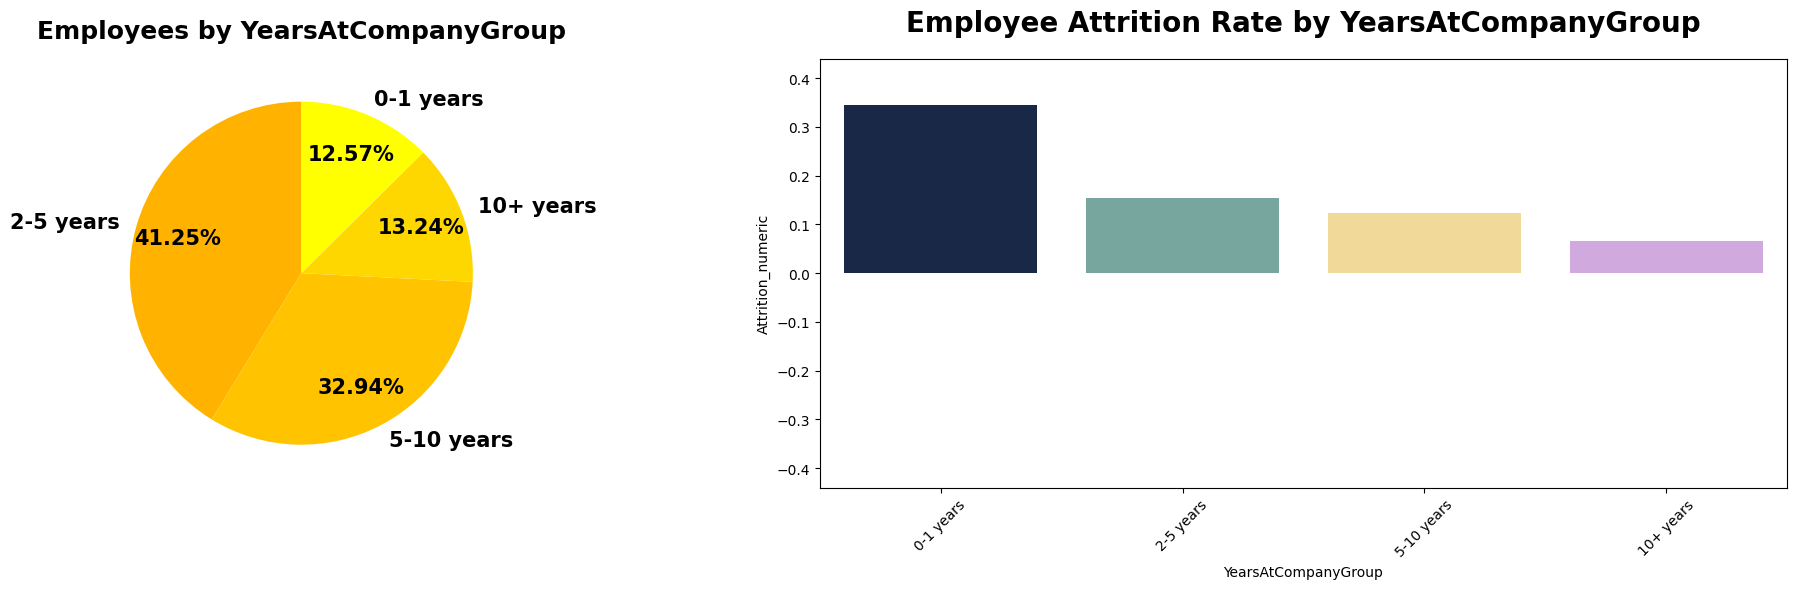

In [162]:
pick_plot(plotType=[1,3] ,col='YearsAtCompanyGroup',DF=E_DF,
          c1=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],
          c2=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most employees has worked for 2 to 10 years in the organization.
- Very few employees has working for less than 1 year or more than 10 years.
- Employee who have worked for 2-5 years are having very high attrition rate.
- Employee who have worked for 10+ years are having low attrition rate.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
23. Analyzing Employee Attrition by Years In Current Role.
</h3>


In [163]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
E_DF["YearsInCurrentRoleGroup"] = pd.cut(E_DF['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)

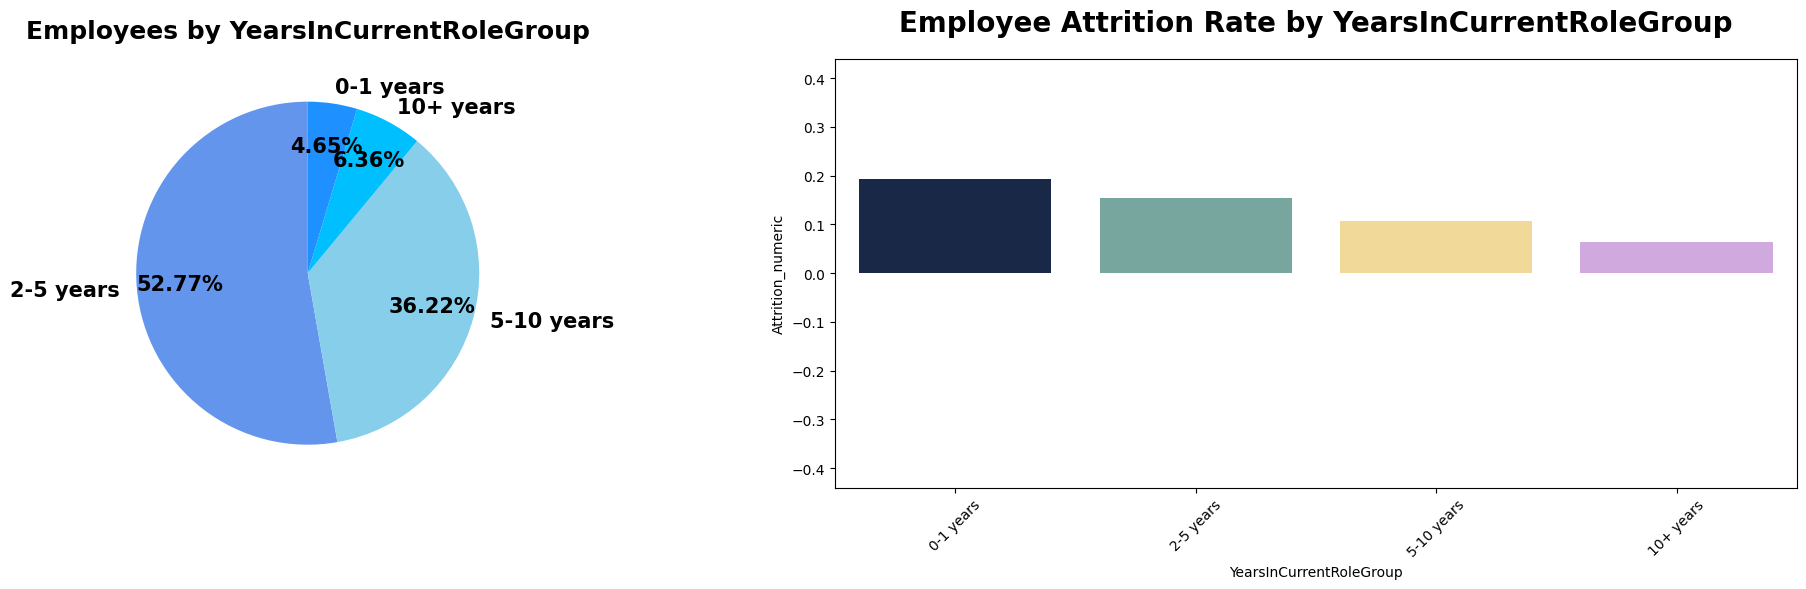

In [164]:
pick_plot(plotType=[1,3] ,col='YearsInCurrentRoleGroup',DF=E_DF,
          c1=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Most employees has worked for 2 to 10 years for the same role in the organization.
- Very few employees has worked for less than 1 year or more than 10 years in the same role.
- Employee who has worked for 2 to 0 years in the same role are having very high attrition rate.
- Employee who has worked for 10+ years in the same role are having low attrition rate.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
24. Analyzing Employee Attrition by Years Since Last Promotion.
</h3>


In [165]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
E_DF["YearsSinceLastPromotionGroup"] = pd.cut(E_DF['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)

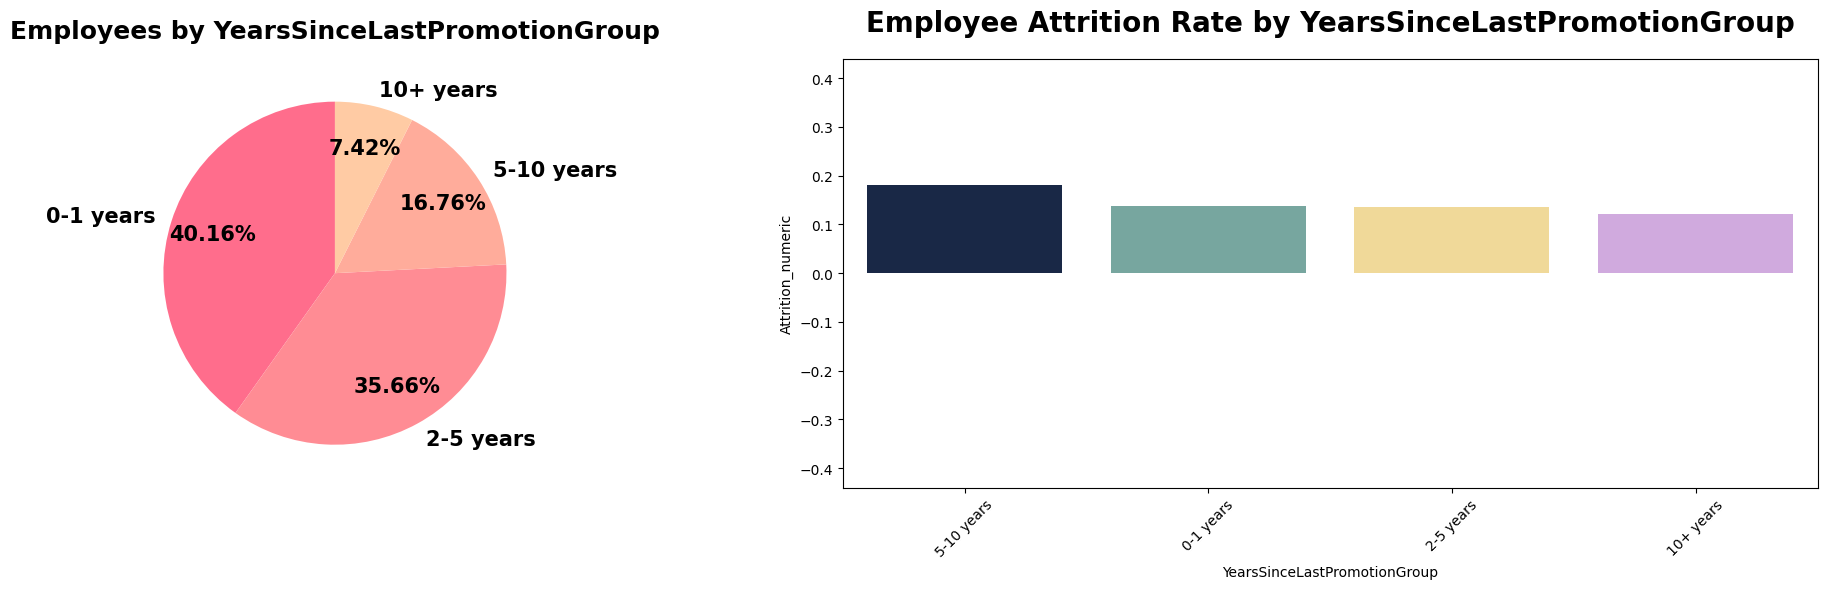

In [166]:
pick_plot(plotType=[1,3] ,col='YearsSinceLastPromotionGroup',DF=E_DF,
          c1=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Almost 36% of employee has not been promoted since 2 to 5 years.
- Almost 8% of employees has not been promoted since 10+ years.
- All the categories in this feature is having high attrition rate specially employee who has not been promoted since 5+ years.
 </h4>
    


<h3 style="background-color:lightcoral; color:White; padding:10px; text-align:center; width:100%;">
25. Analyzing Employee Attrition by Years with Current Manager.
</h3>

In [167]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
E_DF["YearsWithCurrManagerGroup"] = pd.cut(E_DF['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)

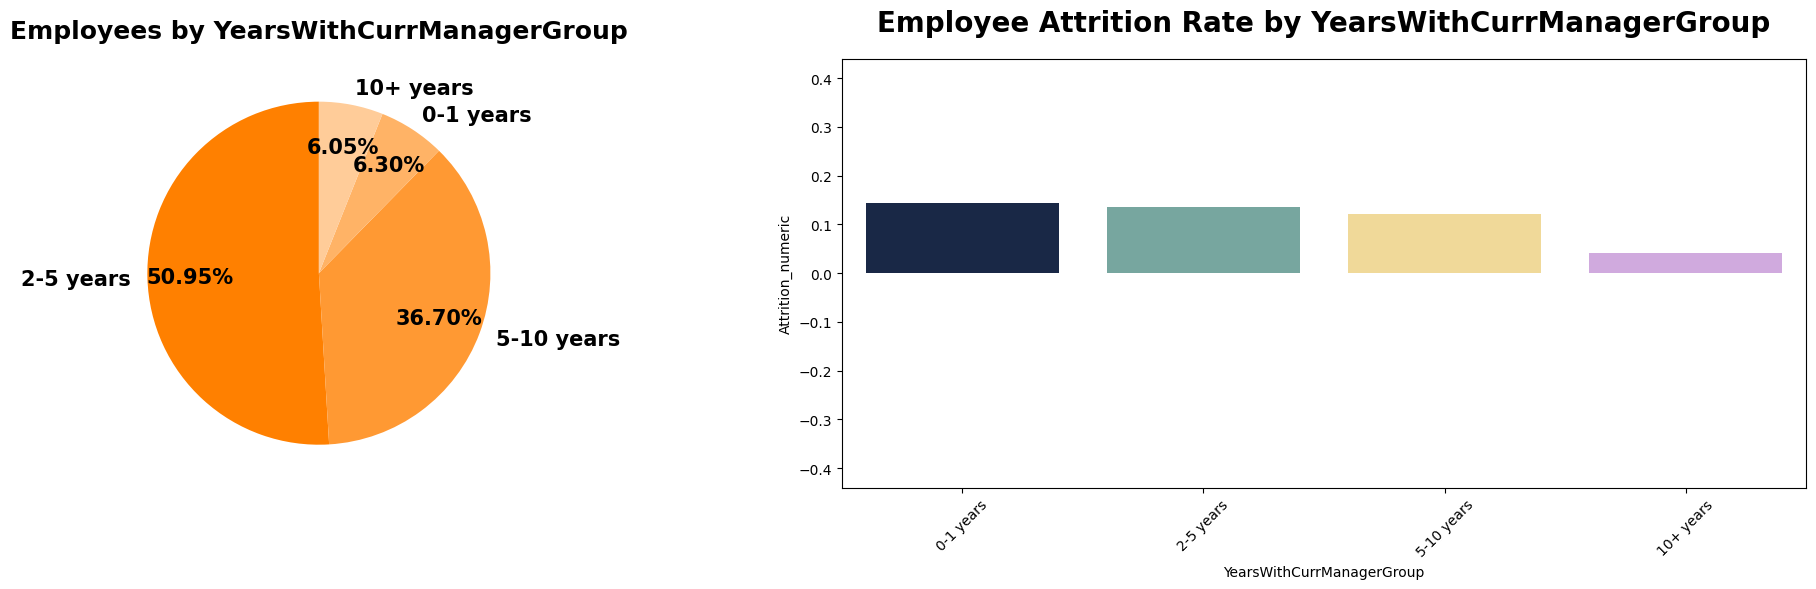

In [168]:
pick_plot(plotType=[1,3] ,col='YearsWithCurrManagerGroup',DF=E_DF,
          c1=['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],
          c2 =["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

<h4>💬 Notes:  

- Almost 51% of employees has worked for 2-5 years with the same manager.
- Employee who has worked for 10+ year with the same manager are having very low attrition rate.
- Other Categories is having high attrition rate.

 </h4>
    


## **4. Feature Engineering**
We will create new features or transform existing ones to improve the performance of our models.

### **4.1 Feature Reduction**


In [171]:
pca = PCA(n_components=None)  # Set n_components=None to retain all components for analysis
df_pca = pca.fit_transform(df_encoded)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance to understand how much variance is captured by each component
print("Explained Variance Ratio: ", explained_variance)
print("Cumulative Explained Variance: ", np.cumsum(explained_variance))

# Step 4: Select number of components (e.g., components that explain 90% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
df_reduced = pca.fit_transform(df_encoded)
# The df_reduced now contains the reduced features with 90% of the variance retained


Explained Variance Ratio:  [9.98064117e-01 8.69671866e-04 4.03326813e-04 3.00155454e-04
 9.20873053e-05 8.21702976e-05 3.68942886e-05 3.24681605e-05
 2.51747075e-05 2.21448867e-05 1.01528566e-05 7.46565441e-06
 7.34498303e-06 7.13584549e-06 6.07310969e-06 5.21054884e-06
 4.31459770e-06 3.09363771e-06 3.00122241e-06 2.88338600e-06
 1.95590952e-06 1.62092024e-06 1.57229960e-06 1.48298900e-06
 1.32013204e-06 1.16657956e-06 1.09545089e-06 9.64232196e-07
 7.10140993e-07 5.75447506e-07 5.07079814e-07 4.89417095e-07
 3.57833023e-07 3.34493173e-07 3.16856561e-07 3.01383795e-07
 2.52066477e-07 6.43470937e-08 2.55211127e-08]
Cumulative Explained Variance:  [0.99806412 0.99893379 0.99933712 0.99963727 0.99972936 0.99981153
 0.99984842 0.99988089 0.99990607 0.99992821 0.99993836 0.99994583
 0.99995317 0.99996031 0.99996638 0.99997159 0.99997591 0.999979
 0.999982   0.99998489 0.99998684 0.99998846 0.99999004 0.99999152
 0.99999284 0.99999401 0.9999951  0.99999607 0.99999678 0.99999735
 0.99999786 

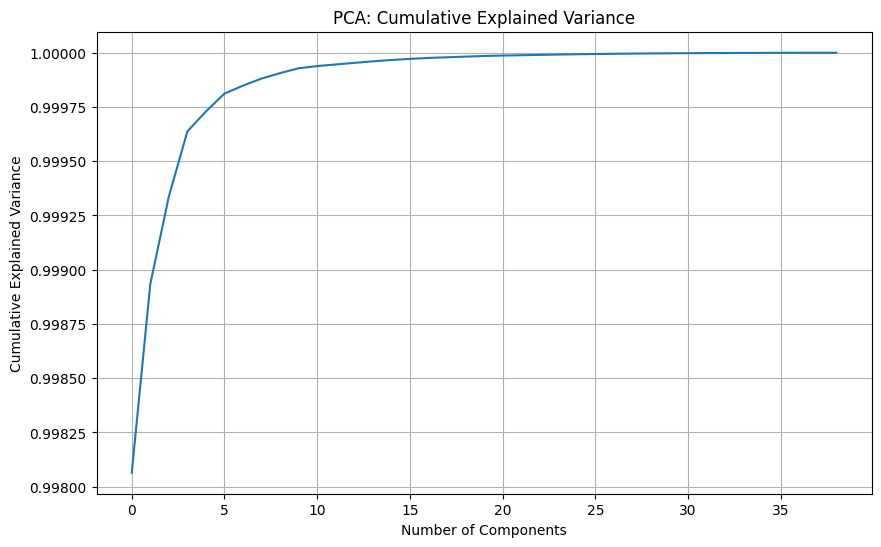

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid(True)
plt.show()


## **5. Model Building**
In this section, we will use machine learning models to predict [target feature].

### **5.1 Splitting the Dataset**
Split the dataset into training and testing sets to evaluate the model’s performance.


In [62]:
# Code for splitting the dataset
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5.2 Model Selection**
We will build different models and evaluate their performance using appropriate metrics.

#### --> 1 - Decision Tree Classifier 

In [63]:
# Code for building models
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

#### --> 2 - Random Forest Classifier 

In [64]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()


### **5.3 Model Evaluation**
Evaluate the models using metrics like accuracy, precision, recall, F1 score, and AUC-ROC.


### --> **DT**

In [65]:
y_pred_DT = DT.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred_DT))
print('R2 Score:', r2_score(y_test, y_pred_DT))
print('accuracy_score',accuracy_score(y_test,y_pred_DT))

MSE: 0.20748299319727892
R2 Score: -0.8033182503770742
accuracy_score 0.7925170068027211


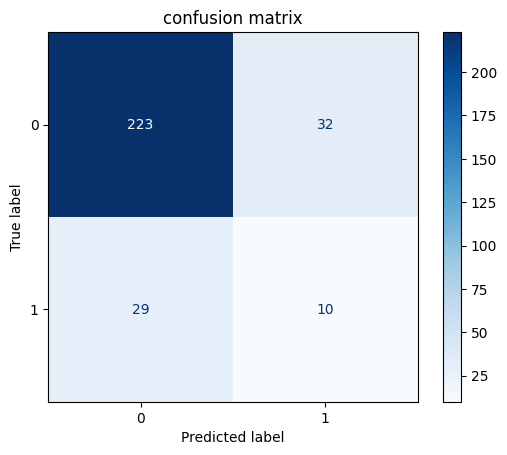

In [66]:
conf_matr = confusion_matrix(y_test,y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=DT.classes_)
disp.plot( cmap=plt.cm.Blues)
plt.title('confusion matrix')
plt.show()


In [67]:
# Get feature importance scores
importance_scores = DT.feature_importances_ 

In [68]:
# create a DataaFrame for Visulaization 
feature_importance = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : importance_scores
})

# sort the DF by importance 
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)
# Display feature importance 
print("Feature Importanc Score -->") 
print('-----------------------------------------')
print(feature_importance)

Feature Importanc Score -->
-----------------------------------------
                     Feature  Importance
22             MonthlyIncome    0.112554
37              OverTime_Yes    0.078718
3                  DailyRate    0.077792
24        NumCompaniesWorked    0.060382
6           DistanceFromHome    0.051504
23               MonthlyRate    0.046942
12                HourlyRate    0.046251
0                        Age    0.045528
29         TotalWorkingYears    0.039033
33        YearsInCurrentRole    0.037311
30     TrainingTimesLastYear    0.036407
32            YearsAtCompany    0.033914
34   YearsSinceLastPromotion    0.032453
20           MaritalStatus_0    0.029005
18                 JobRole_3    0.028271
14                  JobLevel    0.027916
27  RelationshipSatisfaction    0.024027
31           WorkLifeBalance    0.023195
19           JobSatisfaction    0.021456
11   EnvironmentSatisfaction    0.020464
2           BusinessTravel_1    0.019328
28          StockOptionLevel

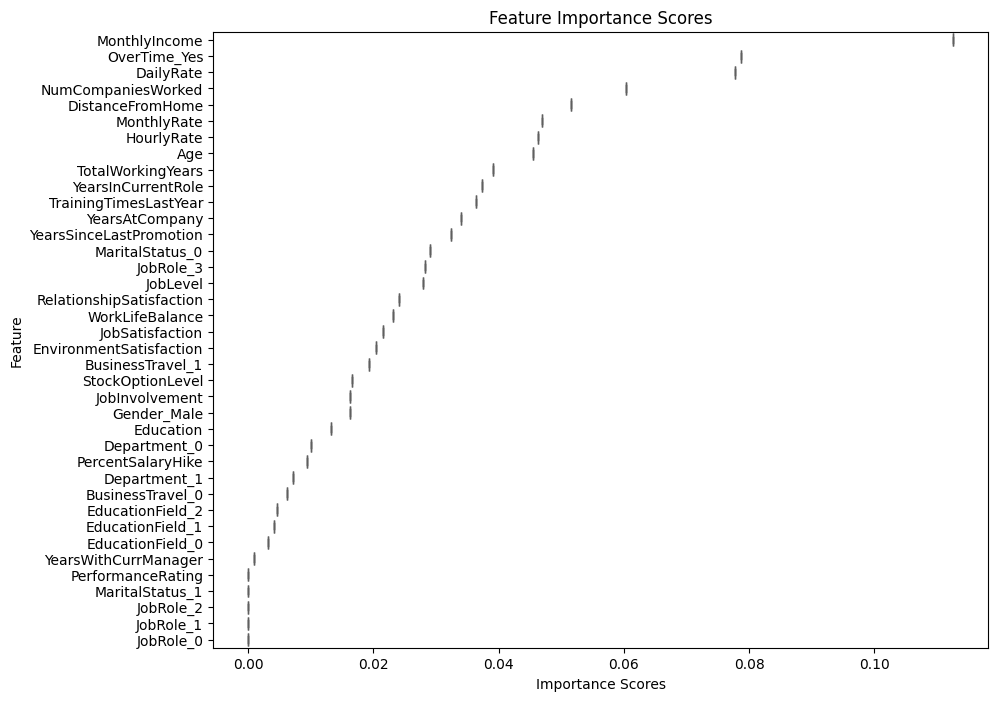

In [69]:
# Visualize the feature importance
plt.figure(figsize=(10,8))
sns.boxplot(x='Importance',y='Feature', data=feature_importance,palette='Set3')
plt.title('Feature Importance Scores')
plt.xlabel('Importance Scores')
plt.ylabel('Feature')
plt.show()

### -- **RF**

In [70]:
# Initialize RFE
rfe = RFE(estimator=RF, n_features_to_select=6) # Adjust the number of features to select
rfe.fit(X_train,y_train)

# Get Feature Ranking 
ranking = rfe.ranking_

# create a DF for visulazing  the feature ranking
feature_ranking = pd.DataFrame({
    'Features' : X.columns,
    'Ranking' : ranking
})

# sort the DF by ranking 
feature_ranking = feature_ranking.sort_values(by='Ranking')
print("Feature Ranking:\n", feature_ranking)



Feature Ranking:
                     Features  Ranking
0                        Age        1
29         TotalWorkingYears        1
3                  DailyRate        1
23               MonthlyRate        1
22             MonthlyIncome        1
12                HourlyRate        1
32            YearsAtCompany        2
6           DistanceFromHome        3
37              OverTime_Yes        4
25         PercentSalaryHike        5
24        NumCompaniesWorked        6
35      YearsWithCurrManager        7
28          StockOptionLevel        8
30     TrainingTimesLastYear        9
34   YearsSinceLastPromotion       10
33        YearsInCurrentRole       11
11   EnvironmentSatisfaction       12
19           JobSatisfaction       13
27  RelationshipSatisfaction       14
14                  JobLevel       15
20           MaritalStatus_0       16
7                  Education       17
13            JobInvolvement       18
31           WorkLifeBalance       19
2           BusinessTravel_1    

accuracy_score 0.8809523809523809
Confusion Matrix without RFE:
 [[255   0]
 [ 35   4]]


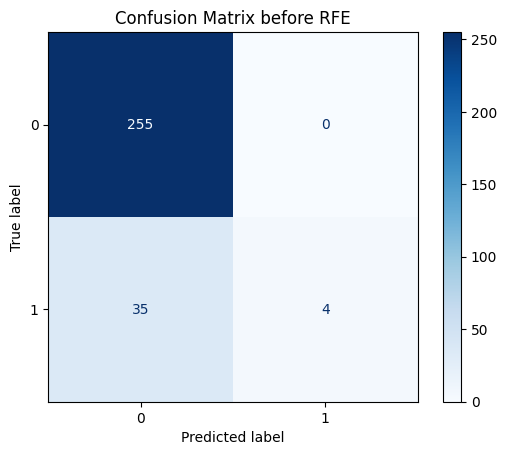

In [71]:
# make prediction on the test set 
y_pred_RF= RF.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_RF))

# Get confusion matrix without RFE
conf_matrix = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix without RFE:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix before RFE')
plt.show()


In [72]:
# make prediction on the test set 
y_pred_rfe = rfe.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_rfe))


accuracy_score 0.8639455782312925


Confusion Matrix:
 [[250   5]
 [ 35   4]]


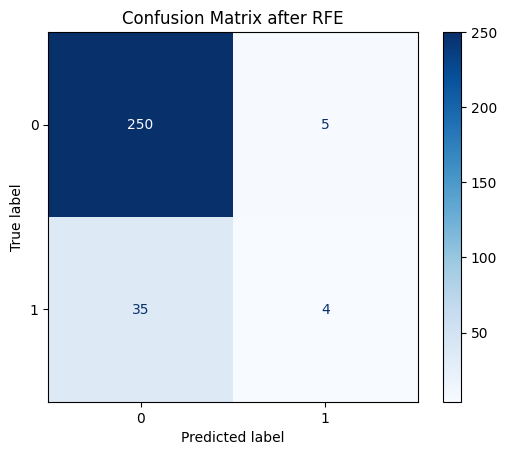

In [73]:
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix after RFE')
plt.show()

### --> Trying diff models, with selected features only 

RF Accuracy Score: 0.8571428571428571
RF Confusion Matrix:
 [[249   6]
 [ 36   3]]


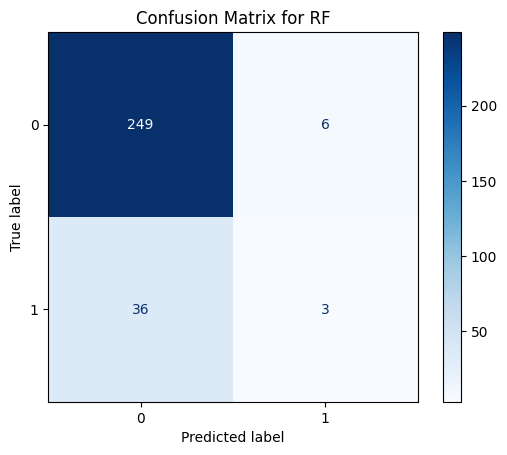

DT Accuracy Score: 0.7789115646258503
DT Confusion Matrix:
 [[218  37]
 [ 28  11]]


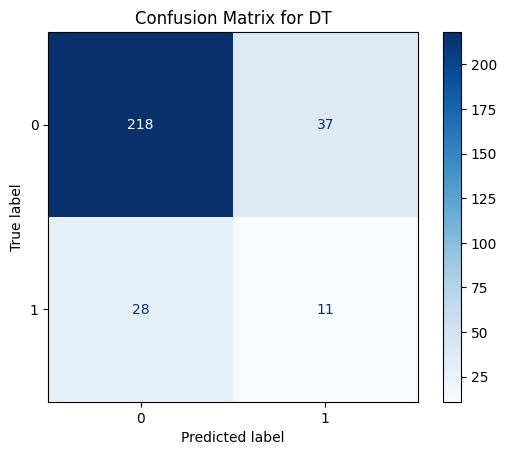

GB Accuracy Score: 0.8605442176870748
GB Confusion Matrix:
 [[250   5]
 [ 36   3]]


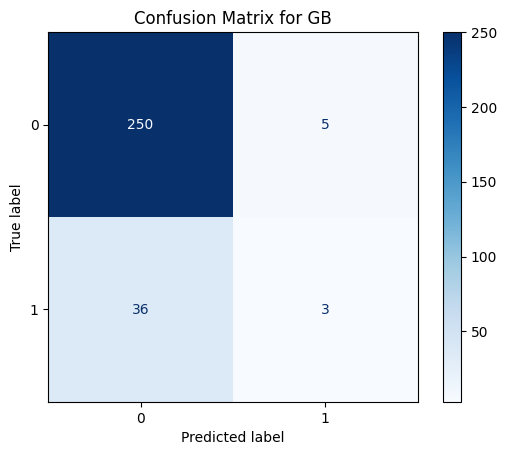

In [74]:
# sel_F1 = ['MonthlyIncome','OverTime_Yes'] 
sel_F1 = ['MonthlyRate','DailyRate','MonthlyIncome','HourlyRate','TotalWorkingYears','OverTime_Yes']

X_train_sel = X_train[sel_F1]
X_test_sel = X_test[sel_F1]

models = {
    'RF' : RandomForestClassifier(),
    'DT' : DecisionTreeClassifier(),
    'GB' : GradientBoostingClassifier()
}

for model_name,model in models.items():
    model.fit(X_train_sel,y_train)
    y_pred = model.predict(X_test_sel)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy Score: {accuracy}")
    
    # Get confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:\n", conf_matrix)
    
    # Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()





## **7. Results and Conclusion**
## Model Performance Overview

1. **Random Forest (RF)**
   - **Accuracy Score**: **0.85** (approximately 85.03%)
   - **Confusion Matrix**:
     ```
     [[248   7]
      [ 37   2]]
     ```
   - **Comments**:
     - The model correctly predicted 248 instances as not leaving (True Negatives) and 2 instances as leaving (True Positives).
     - It made 7 false positives (incorrectly predicting that employees would leave), and 37 false negatives (incorrectly predicting that employees would stay).
     - The RF model performs well, with a good balance between precision and recall, though there is still room for improvement in reducing false negatives.

2. **Decision Tree (DT)**
   - **Accuracy Score**: **0.76** (approximately 75.85%)
   - **Confusion Matrix**:
     ```
     [[217  38]
      [ 33   6]]
     ```
   - **Comments**:
     - The DT model has lower accuracy compared to the RF and GB models.
     - It correctly predicted 217 instances as not leaving and 6 instances as leaving.
     - The model made 38 false positives and 33 false negatives, indicating it struggles more than the RF and GB models in correctly predicting employees at risk of attrition.
     - This suggests that the Decision Tree may be overfitting to the training data or not capturing the underlying patterns effectively.

3. **Gradient Boosting (GB)**
   - **Accuracy Score**: **0.86** (approximately 86.05%)
   - **Confusion Matrix**:
     ```
     [[250   5]
      [ 36   3]]
     ```
   - **Comments**:
     - The GB model has the highest accuracy among the three, indicating that it is the most effective at predicting employee attrition based on the selected features.
     - It correctly classified 250 employees as not leaving and 3 as leaving, with only 5 false positives and 36 false negatives.
     - This model demonstrates a strong ability to discriminate between employees who are likely to leave and those who are not, although the false negatives indicate some employees at risk of leaving are still being misclassified.

## Summary of Insights
- **Feature Selection**: The selected features (`['MonthlyRate', 'DailyRate', 'MonthlyIncome', 'HourlyRate', 'EmployeeNumber', 'TotalWorkingYears', 'OverTime_Yes']`) seem to provide good predictive power, especially for the RF and GB models, indicating that they capture relevant information about employee behavior.
  
- **Model Comparison**:
  - The **Random Forest** and **Gradient Boosting** models outperform the **Decision Tree** in terms of both accuracy and the ability to minimize false positives and negatives.
  - **Gradient Boosting** is the best model among the three, suggesting it has learned better from the patterns in the data.

- **Potential Improvements**:
  - Consider further tuning the models, especially the Decision Tree, by adjusting hyperparameters or trying ensemble methods.
  - Addressing the false negatives, especially for the RF and GB models, could be crucial in a business context where missing an at-risk employee could have significant consequences.

## Conclusion
Overall, the Gradient Boosting model is the strongest performer, but all three models provide useful insights into employee attrition. You may want to explore further improvements or even consider hybrid approaches to enhance predictive accuracy.
